## **Importing my toolsets**

In [1]:
import processing as pro
import fitting as fit
import visualize as vis
import peaks as pks

# **Specifying location of our file**

In [2]:
file_path = "../Raman/graphene/GF_04_10x10um_Map.txt"  # Change this to your Raman data file path

# **Reading our datafile. If datafile is a map, specify map = True. col_num specifies which spectrum you would like to plot from input map file.**

In [4]:
raman_shift, intensity, df, yx = pro.read_raman_data(file_path, col_num = 5, map = True, csv = False) 

Reading text file...


0         1         2         3         4         5         6   \
0     1251.22   90.0000   88.8053   91.0748   87.4533   82.5654   83.5016   
1     1252.83   87.1491   84.9424   87.8012   85.0759   83.7087   83.1042   
2     1254.43   89.2731   87.4158   91.9579   90.4132   84.6341   85.4498   
3     1256.04   85.2221   87.6129   89.5787   95.0385   85.0901   87.3722   
4     1257.64   88.4704   84.1059   87.5258   89.5354   86.4873   84.0845   
...       ...       ...       ...       ...       ...       ...       ...   
1172  2943.71  179.8720  185.2140  184.6880  182.6800  180.4360  181.0540   
1173  2945.01  187.9460  185.5940  182.8910  180.1510  179.6480  182.4810   
1174  2946.31  185.9080  184.0810  179.1920  180.1800  182.0990  185.0870   
1175  2947.62  193.4460  189.2180  184.1060  183.9200  174.2980  185.3380   
1176  2948.92  188.3330  187.6670  183.0000  182.6670  177.3330  185.0000   

            7         8         9   ...        16        17        18  \
0      84.4081   82.9626   86.4907  ...   83.0000   82.1760   86.0374   
1      83.0508   81.2483   88.9207  ...   85.6313   80.0407   87.0454   
2      79.9790   88.0276   87.5027  ...   79.9879   81.1661   89.1783   
3      82.2944   88.1443   85.5169  ...   84.2330   82.3235   85.2541   
4      84.1137   84.9941   85.8034  ...   85.0615   78.3883   84.7134   
...        ...       ...       ...  ...       ...       ...       ...   
1172  176.5500  181.4630  172.1730  ...  181.8460  176.6210  177.6040   
1173  179.5300  180.7790  177.2130  ...  183.6620  177.2300  181.3690   
1174  181.4090  184.9470  180.7280  ...  180.7760  182.6260  176.2260   
1175  172.6220  180.8750  171.7330  ...  182.9510  178.0740  180.4570   
1176  175.6670  171.3330  180.6670  ...  179.6670  179.3330  180.6670   

            19        20        21        22        23        24        25  
0      87.1760   80.7788   84.3333   88.8240   83.9065   83.9813   81.2321  
1      85.6987   80.5971   83.6270   86.4524   88.8392   86.4329   81.9627  
2      82.8771   79.7819   82.1795   88.1007   89.7087   88.5935   87.3433  
3      81.3998   78.2217   86.5224   86.2911   83.1025   87.0167   85.0429  
4      79.7588   80.1753   82.1024   83.9515   84.4049   82.8269   80.7890  
...        ...       ...       ...       ...       ...       ...       ...  
1172  171.7110  174.1030  176.4460  182.9970  194.1190  190.8830  178.5780  
1173  175.9230  175.5790  184.4190  189.5400  188.6590  182.7260  183.9560  
1174  188.1400  170.8070  182.1570  182.0640  186.5090  188.5240  181.7880  
1175  175.1270  174.4430  178.7500  187.9750  182.8910  188.6710  183.6230  
1176  179.3330  168.0000  182.6670  188.3330  192.0000  177.6670  175.0000  

[1177 rows x 26 columns]

In [5]:
display(yx)

y    x
0  -5.0 -5.0
1  -5.0 -2.5
2  -5.0  0.0
3  -5.0  2.5
4  -5.0  5.0
5  -2.5 -5.0
6  -2.5 -2.5
7  -2.5  0.0
8  -2.5  2.5
9  -2.5  5.0
10  0.0 -5.0
11  0.0 -2.5
12  0.0  0.0
13  0.0  2.5
14  0.0  5.0
15  2.5 -5.0
16  2.5 -2.5
17  2.5  0.0
18  2.5  2.5
19  2.5  5.0
20  5.0 -5.0
21  5.0 -2.5
22  5.0  0.0
23  5.0  2.5
24  5.0  5.0

# **Normalizing the data**

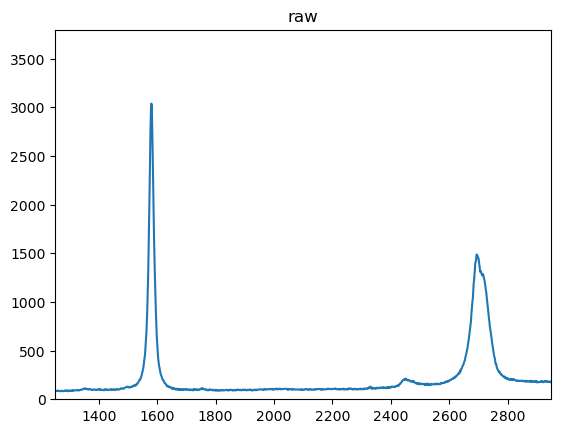

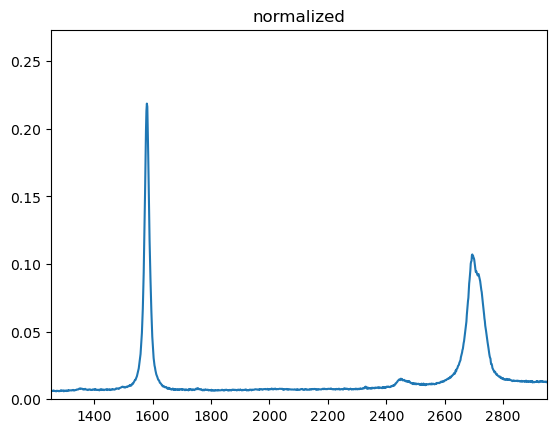

In [6]:
intensity = pro.normalize(raman_shift, intensity)

# **Guess of deg**

In [7]:
deg = 1

# **Removing the baseline, adjusting the degrees may be necessary as oscillation can occur if set too high or low**

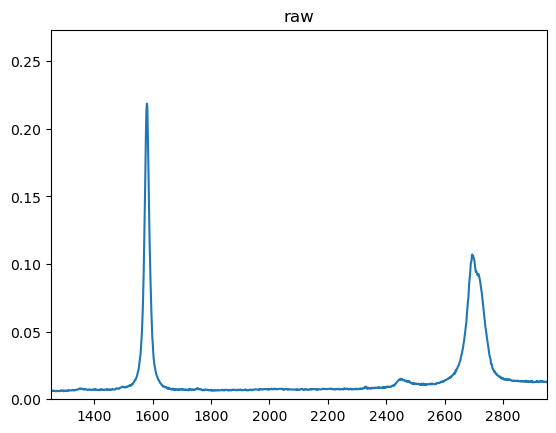

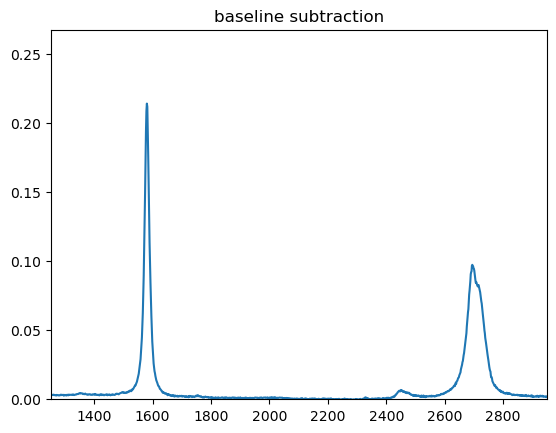

In [8]:
intensity = pro.remove_baseline(raman_shift, intensity, deg)

# **Height and spacing parameters**

In [9]:
height = 0.050
spacing = 100

## **Calculating the peaks from the raw data for use in guessing the fits**

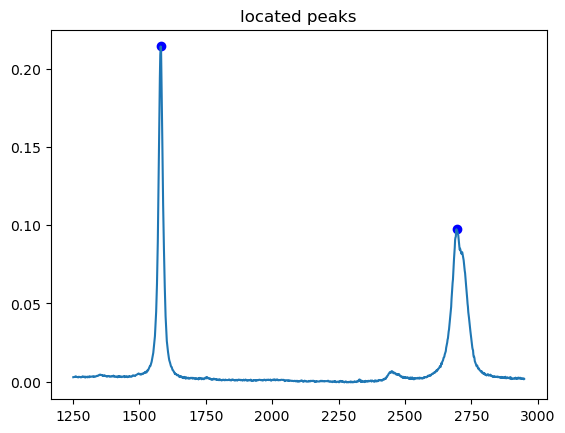

In [10]:
peaks = pks.identify_peaks(raman_shift, intensity, height, spacing)

# **Fitting via lorentzian**

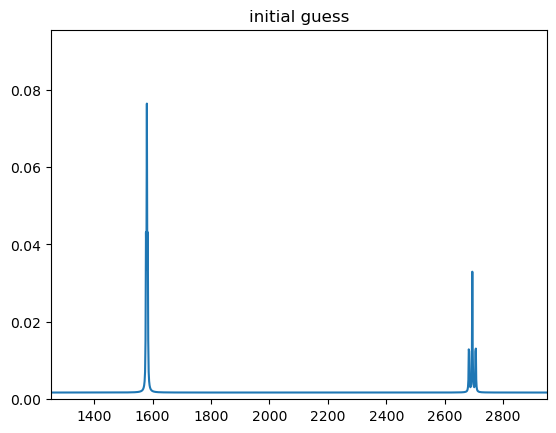

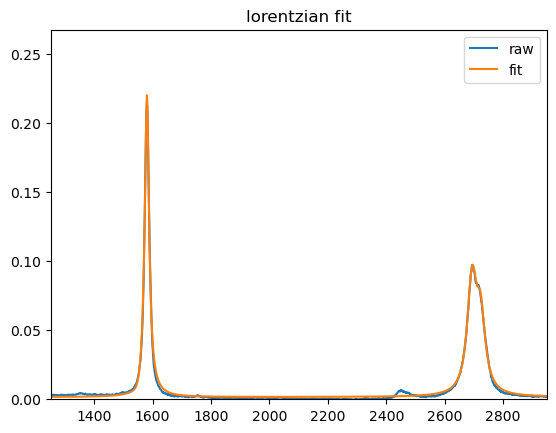

R^2 score: 0.9957317602099174


In [11]:
l_fit_int, l_r2 = fit.raman_lfitter(raman_shift, intensity, peaks)

## **Fitting via gaussian**

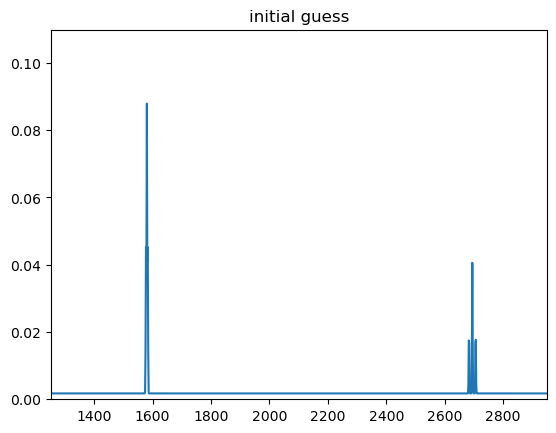

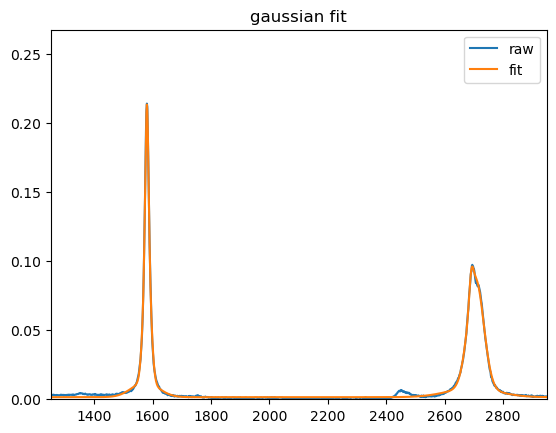

R^2 score: 0.9972421716059656


In [12]:
g_fit_int, g_r2 = fit.raman_gfitter(raman_shift, intensity, peaks)

# **Fitting via voigt**

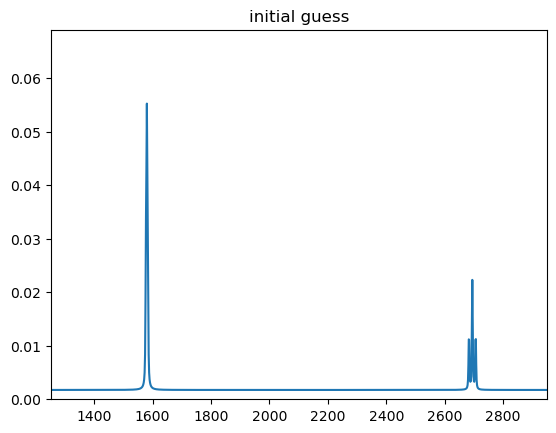

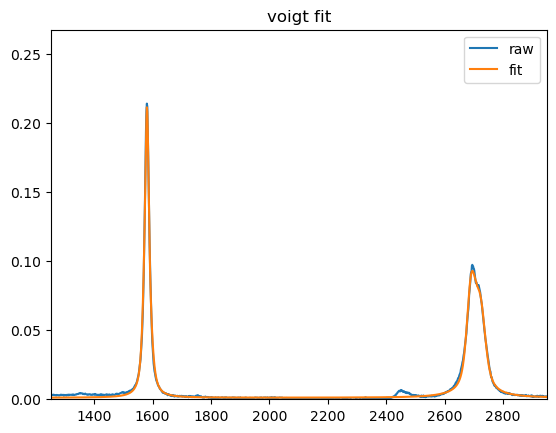

R^2 score: 0.9963015955455111


In [13]:
v_fit_int, v_r2 = fit.raman_vfitter(raman_shift, intensity, peaks)

# **Picking the best fit**

In [14]:
intensity = g_fit_int

# **Calculating the peaks from fitted data**

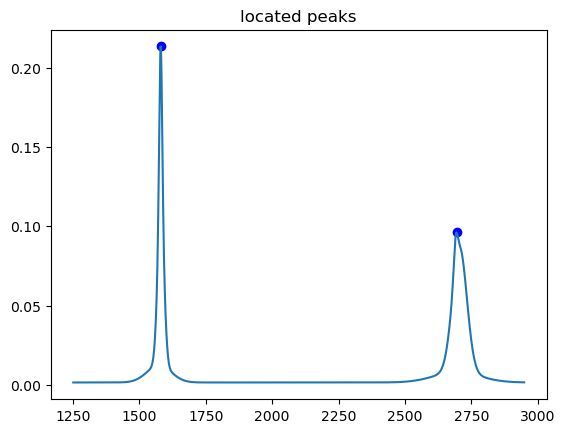

In [15]:
peaks = pks.identify_peaks(raman_shift, intensity, height, spacing)

# **Calculating the area underneath every peak**

In [16]:
peak_integrals = pks.peak_integrals(peaks, raman_shift, intensity)

## **User input cell: Name of material, labels of peaks (left to right), ratio you want to calculate (2 in place of location of numerator peak, 1 for denominator. For example, if labels = ["1st", "2nd", "3rd"], and I want the "3rd"/"2nd" ratio, I would set desired_ratio = [0,1,2])**

In [17]:
material = "graphene"
labels = ['d', 'g']
desired_ratio = [1,2]

# **Calculating the ratios (intensity and areas)**

In [18]:
int_ratio = pks.intensity_ratio(desired_ratio, peaks)
area_ratio = pks.integral_ratio(desired_ratio, peak_integrals)
display(int_ratio)
display(area_ratio)

0.45063587931376314

1.4612657257929151

# **Labelling the ratio**

In [19]:
ratio_label, ratio_df = pks.ratiolabeler(labels, desired_ratio, int_ratio, area_ratio)

# **Calculating all possible peak-to-peak distances**

In [20]:
distances, dist_labels, distance_df = pks.peak_distances(peaks, labels)

# **Visualizing the data**

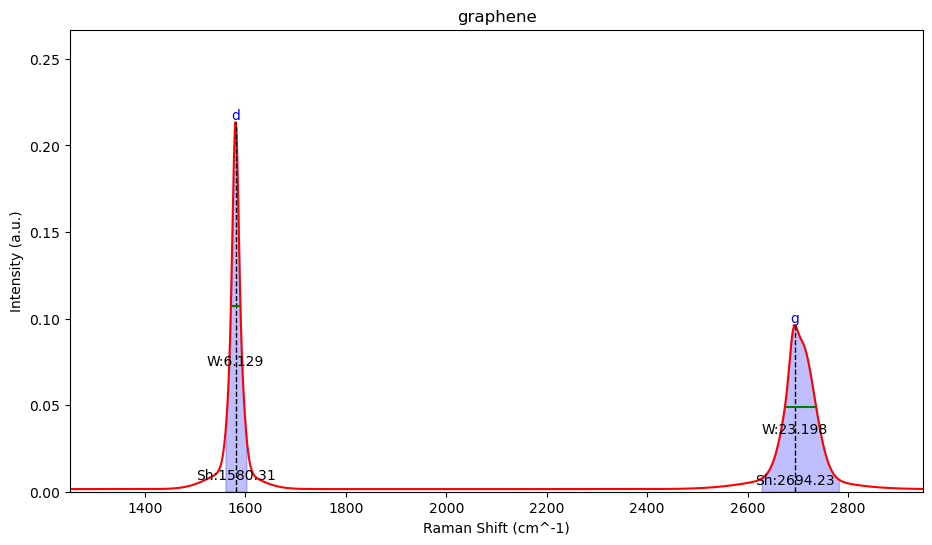

Intensity  Integral
g/d   0.450636  1.461266

d-g
Peak distances  1113.92

{'peak_indices': array([209, 983]),
 'peak_intensity': array([0.2134394 , 0.09618345]),
 'peak_raman_shifts': array([1580.31, 2694.23]),
 'peak_widths': [6.128798212379252, 23.197751233381723],
 'width_heights': array([0.10748268, 0.04889678]),
 'left_ips': array([1571.09573147, 2674.26081637]),
 'right_ips': array([1590.02207041, 2736.5435633 ])}

In [21]:
vis.plot_spectrum(raman_shift, intensity, peaks, labels, material)
display(ratio_df)
display(distance_df)
display(peaks)

# **If it's a map, run this cell**

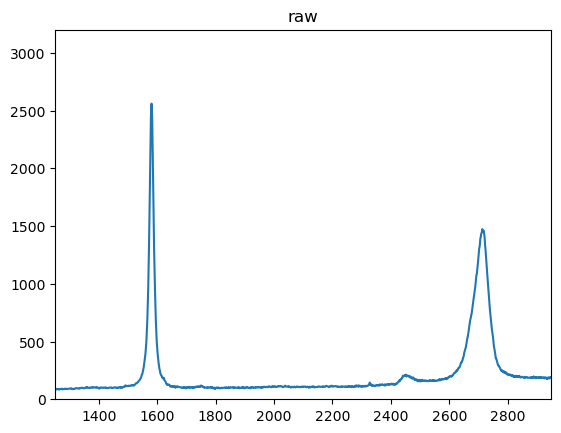

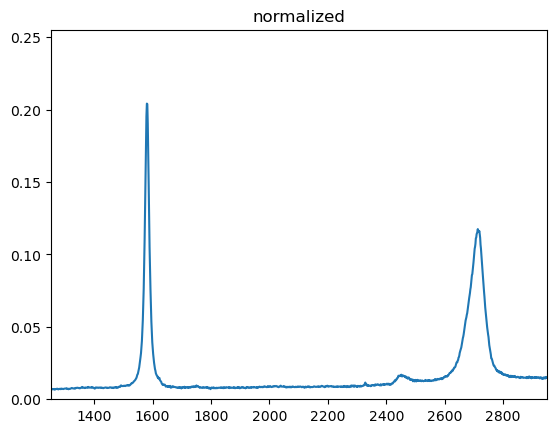

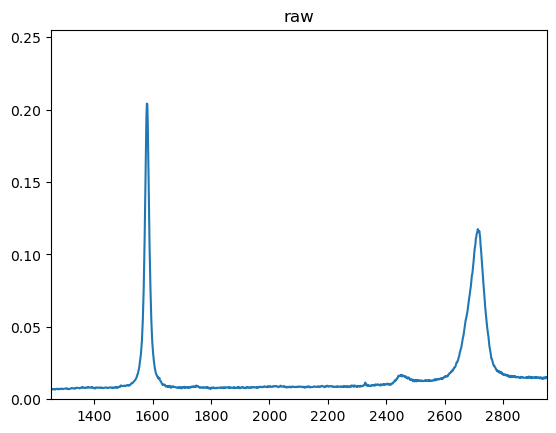

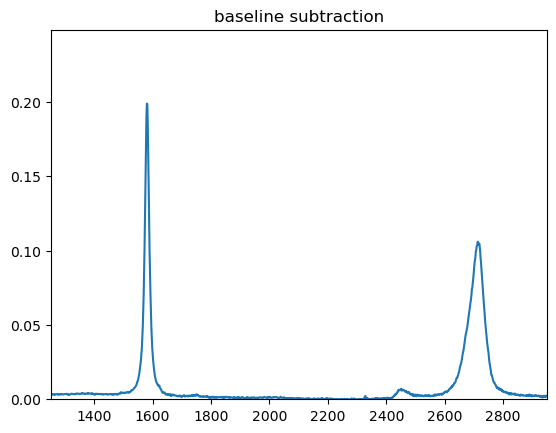

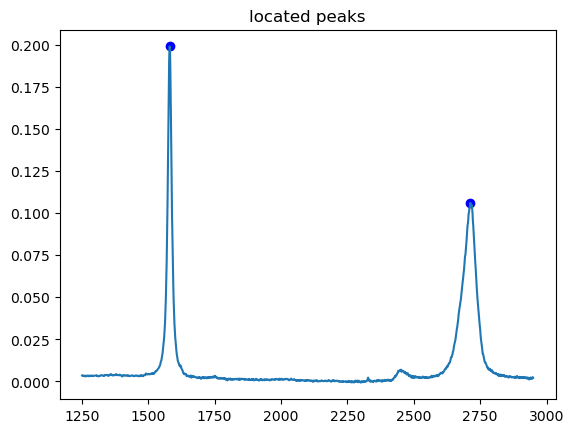

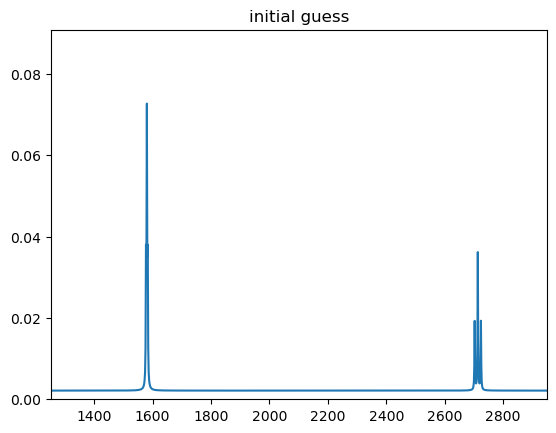

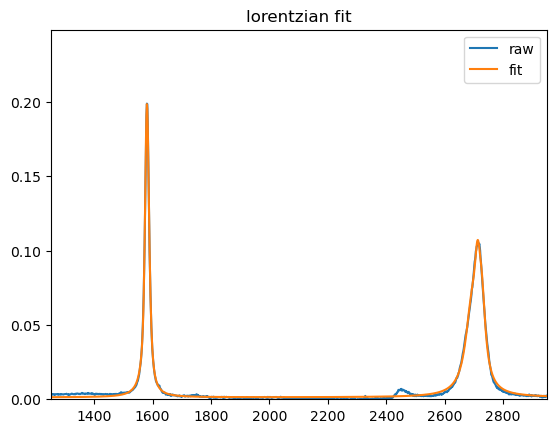

R^2 score: 0.9964813791603397


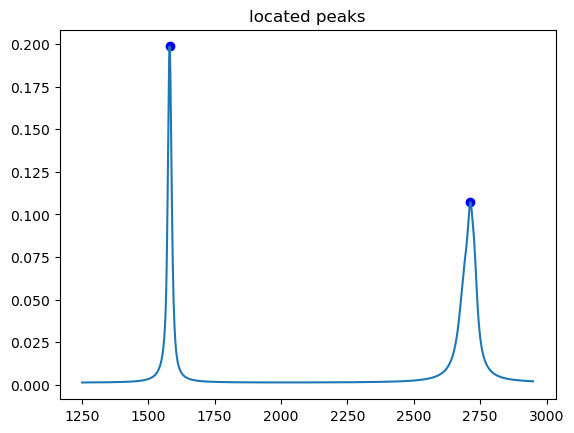

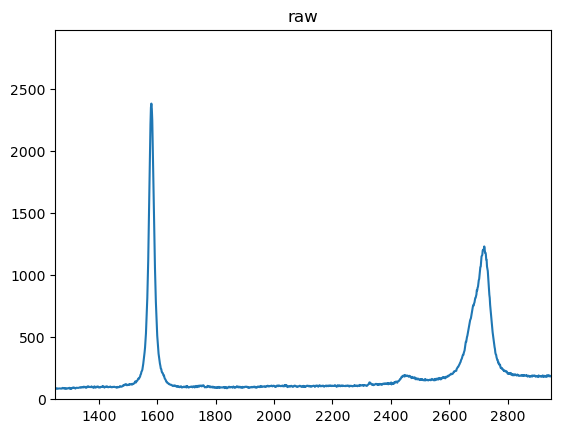

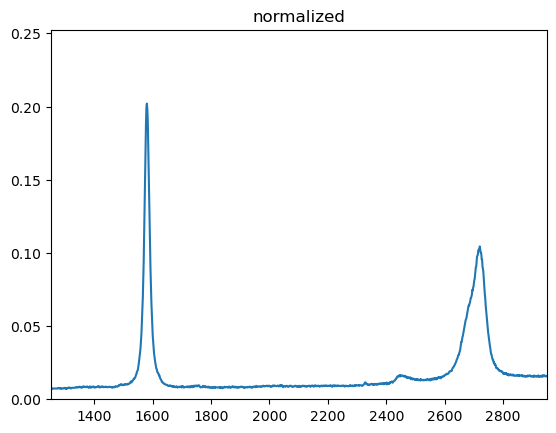

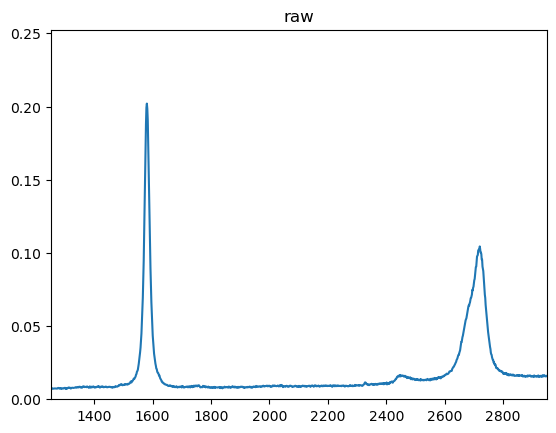

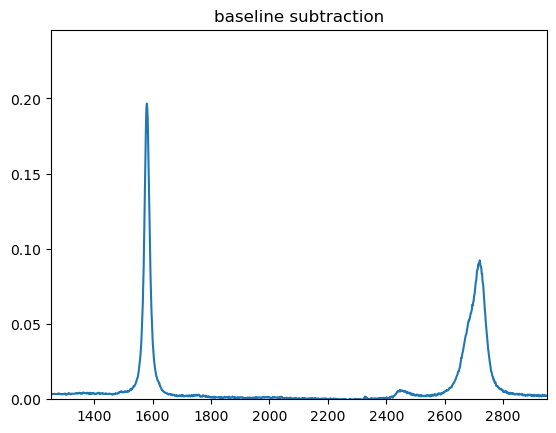

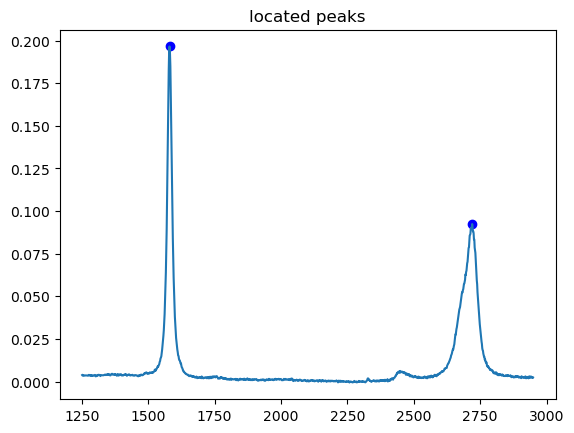

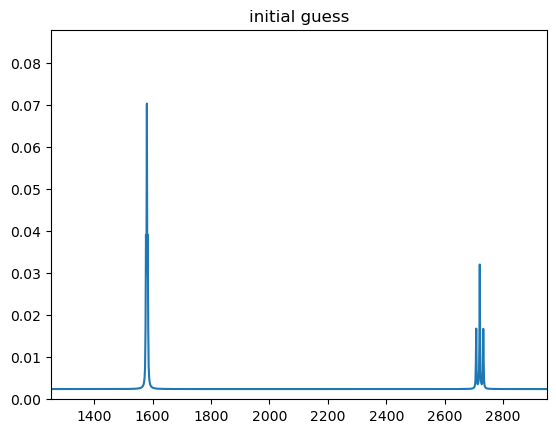

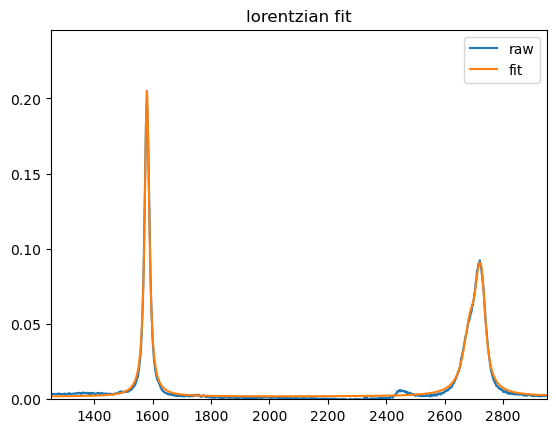

R^2 score: 0.9946360495914247


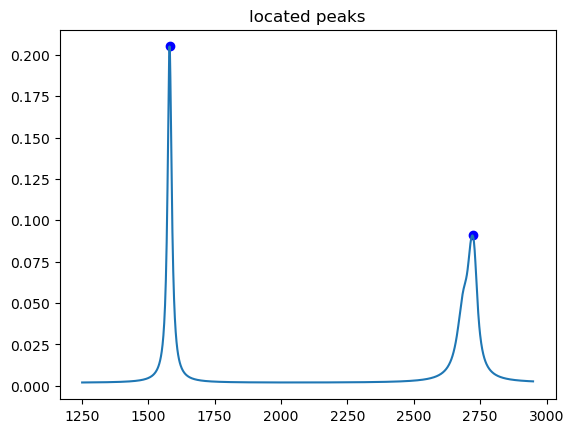

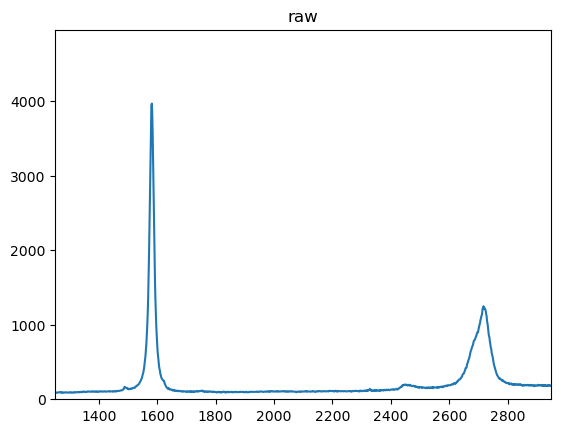

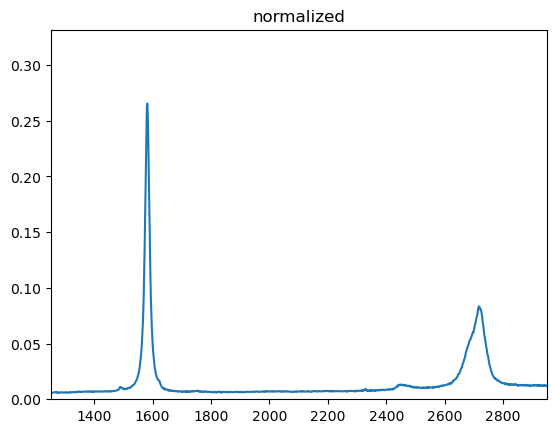

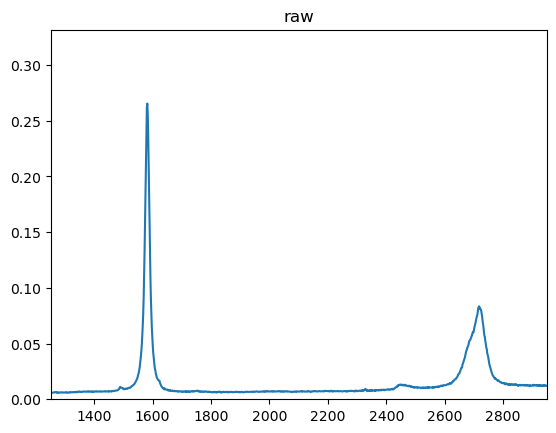

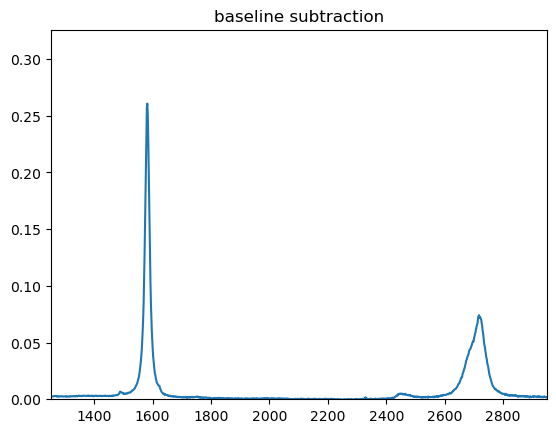

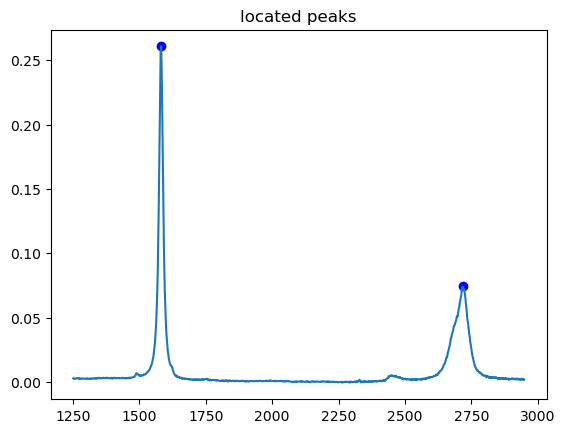

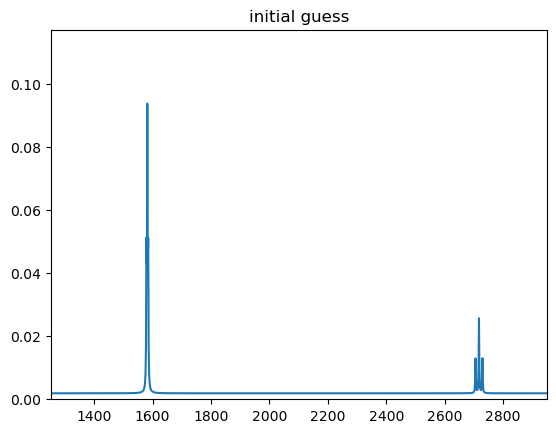

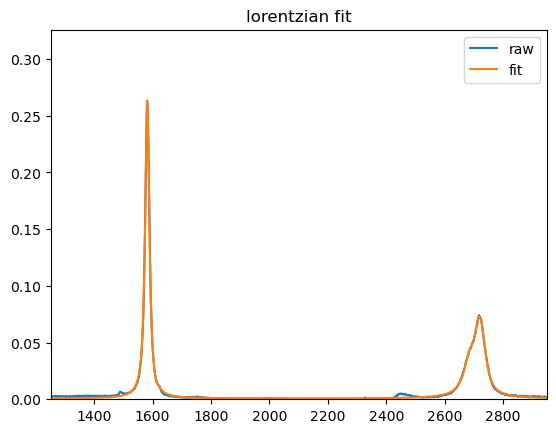

R^2 score: 0.9981078648457857


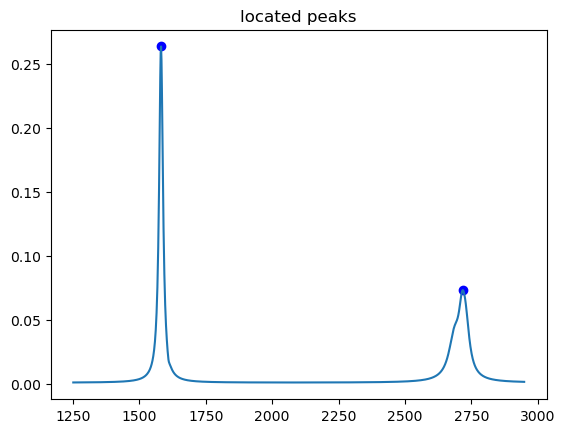

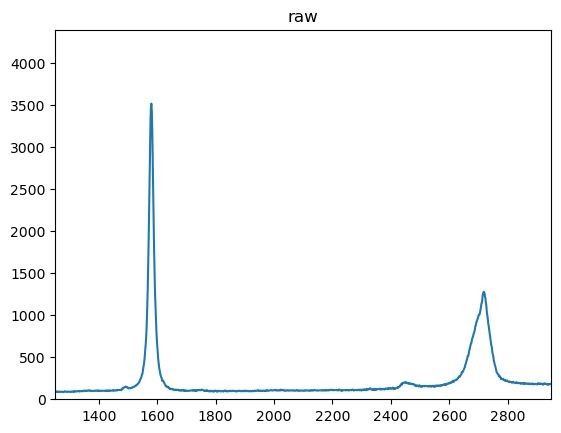

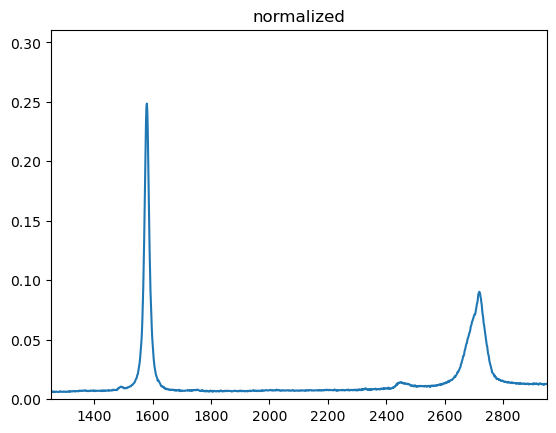

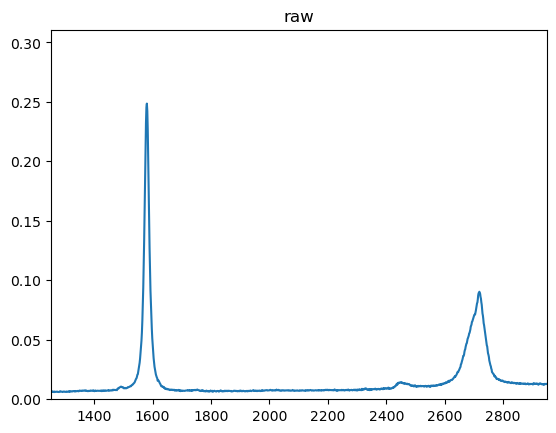

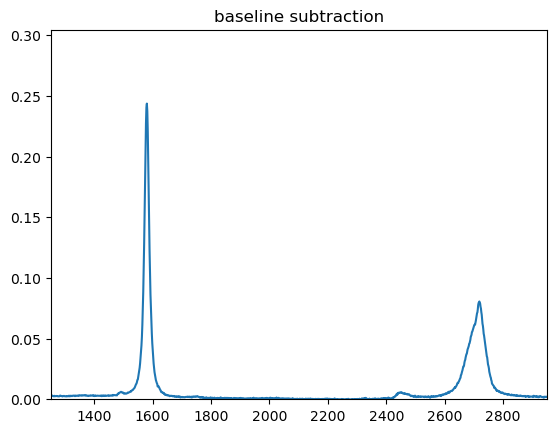

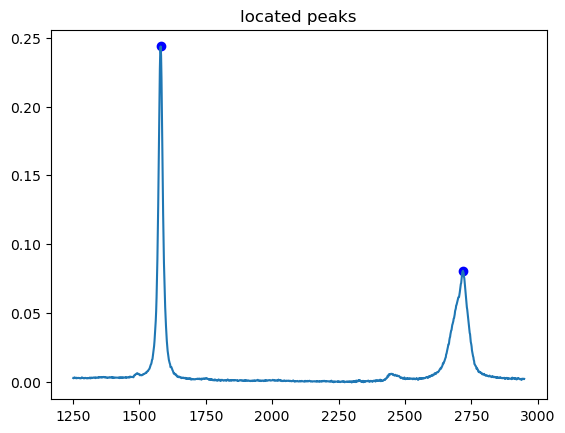

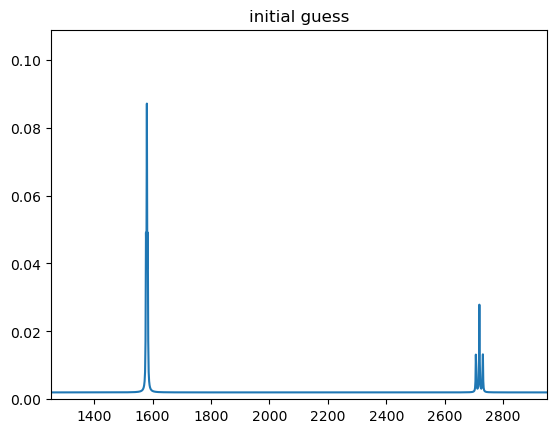

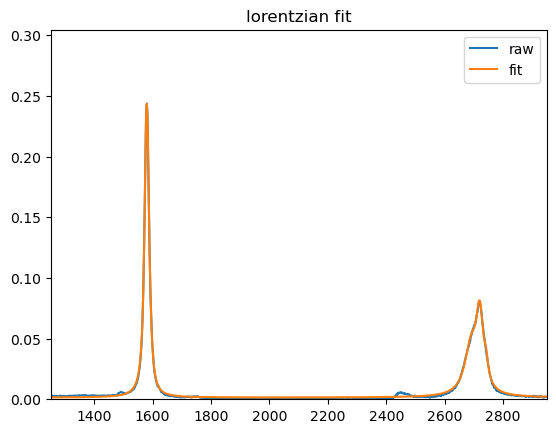

R^2 score: 0.9976095309490024


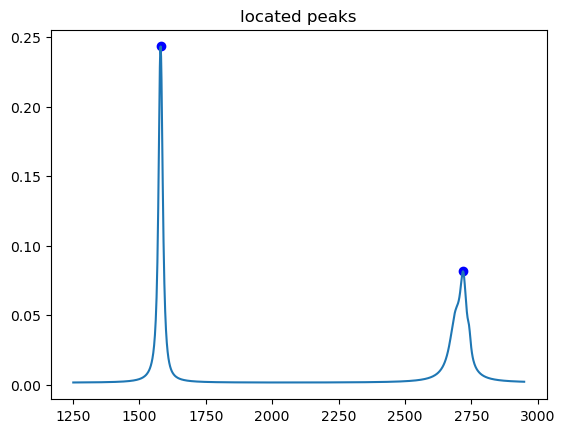

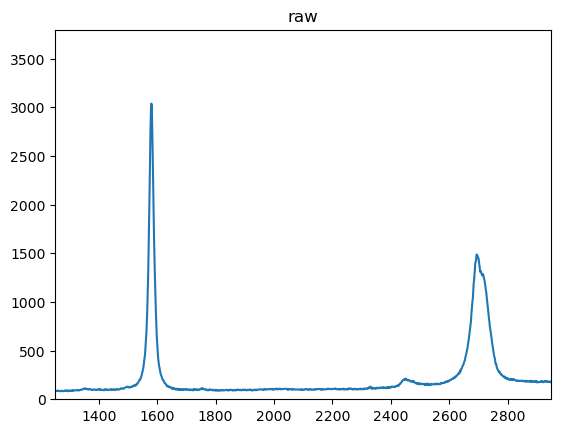

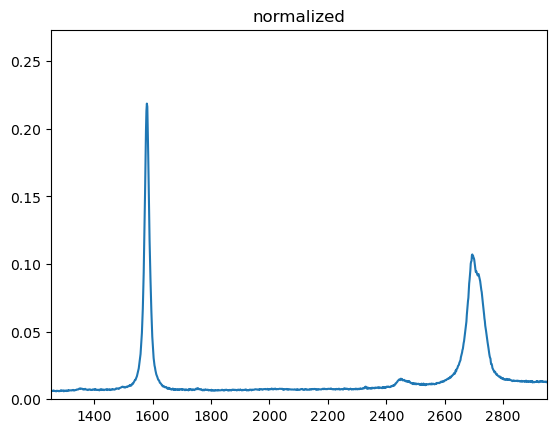

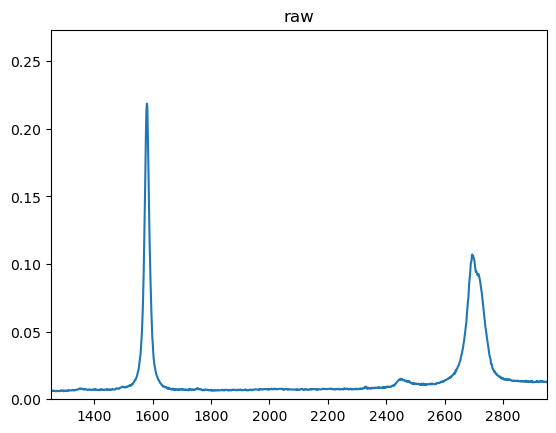

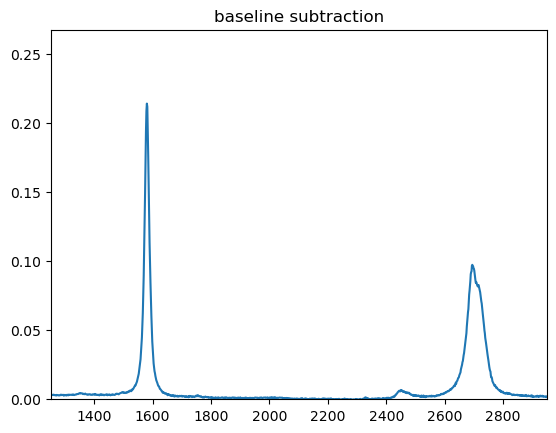

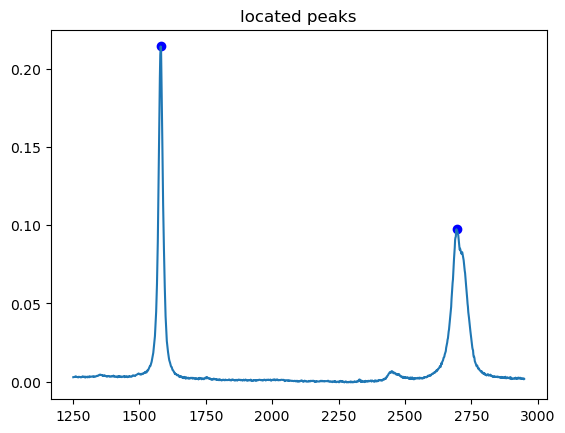

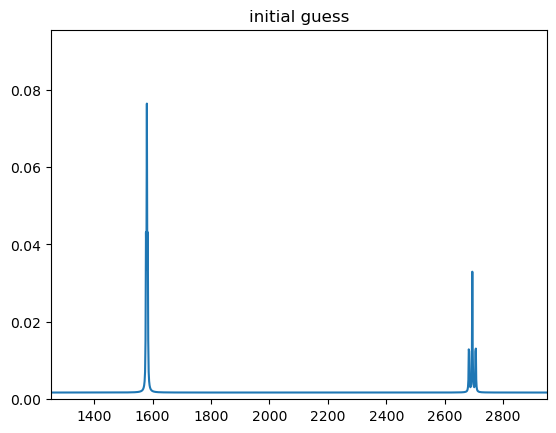

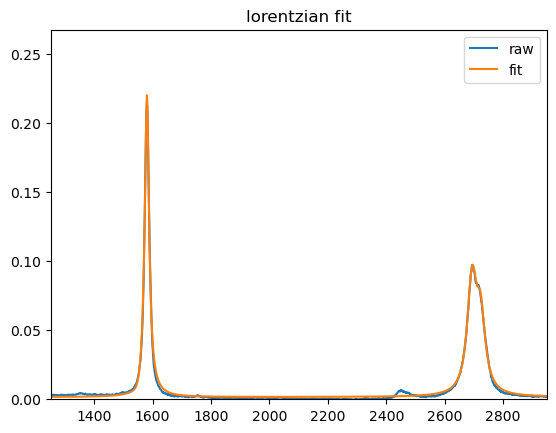

R^2 score: 0.9957317602099174


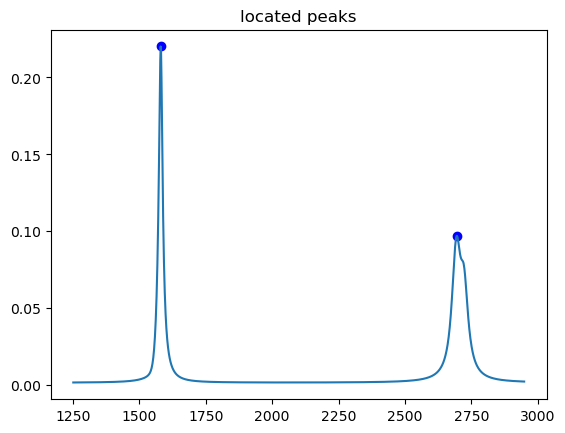

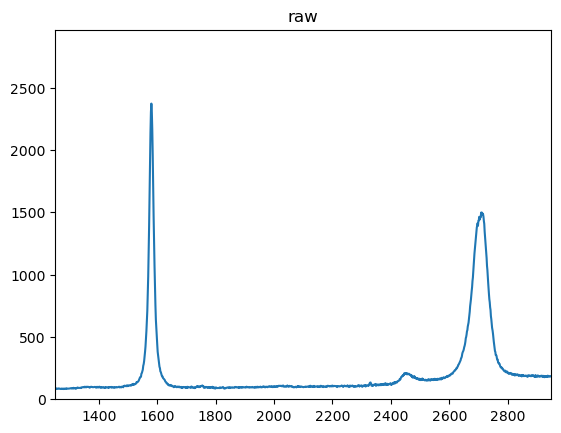

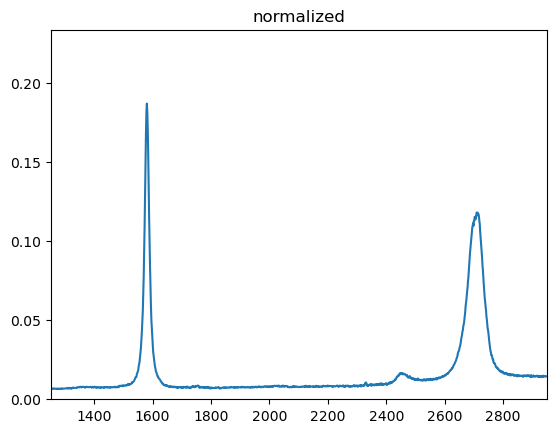

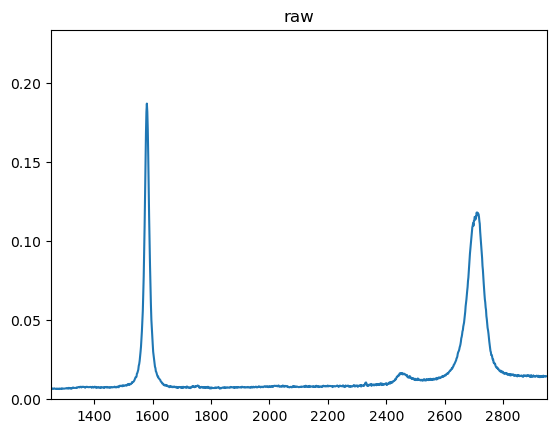

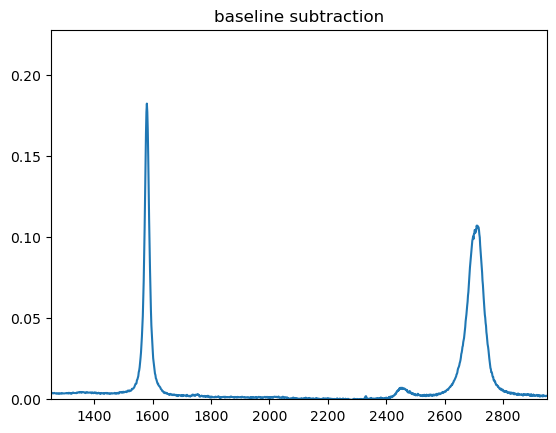

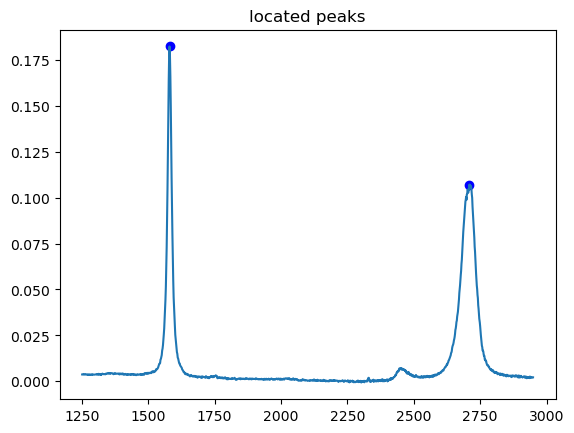

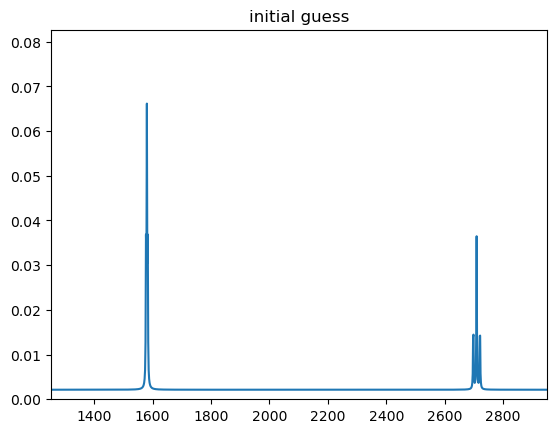

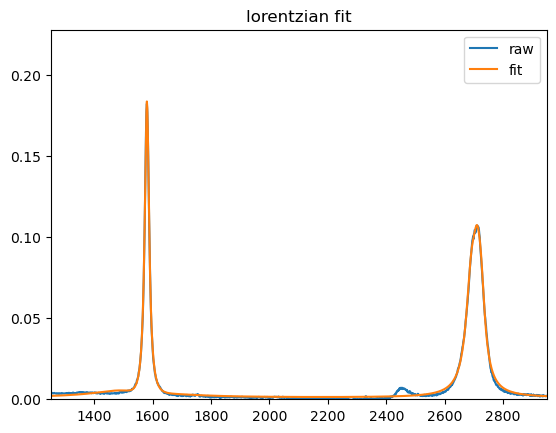

R^2 score: 0.9970653463996573


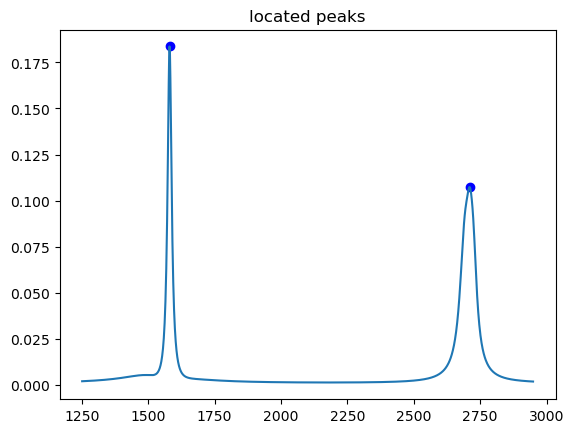

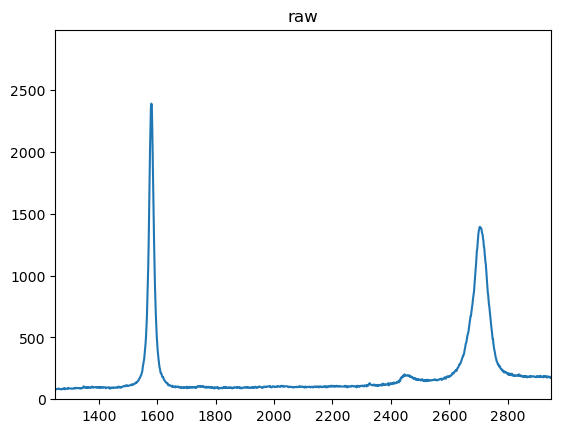

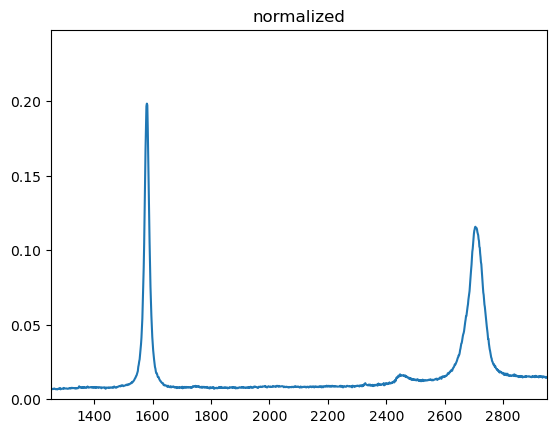

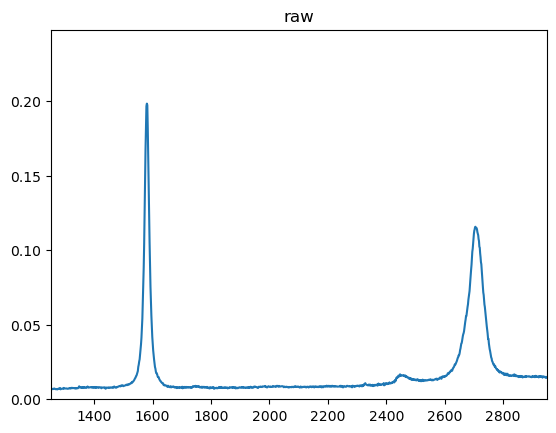

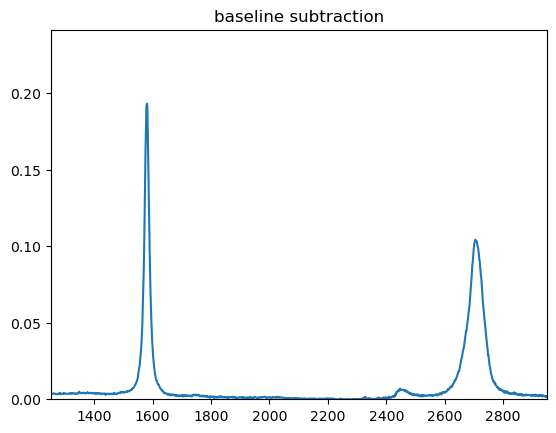

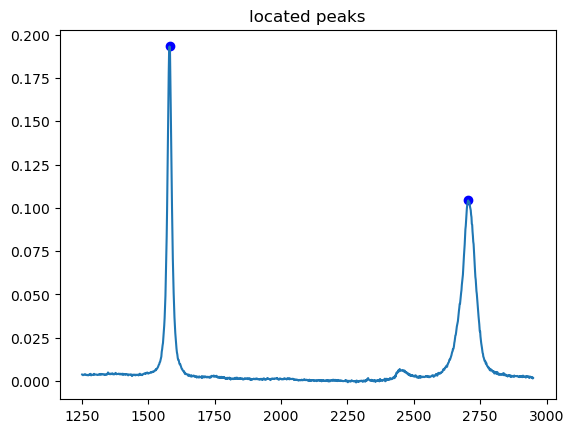

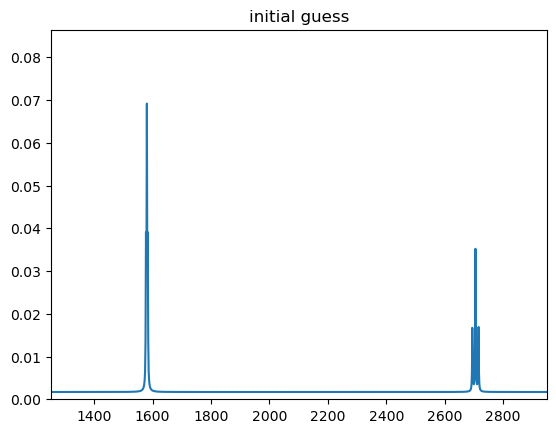

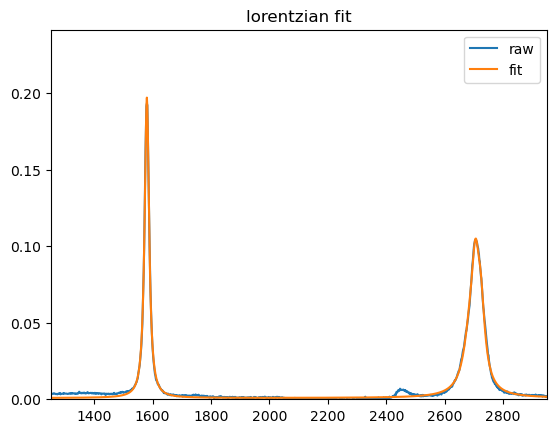

R^2 score: 0.9960722460753962


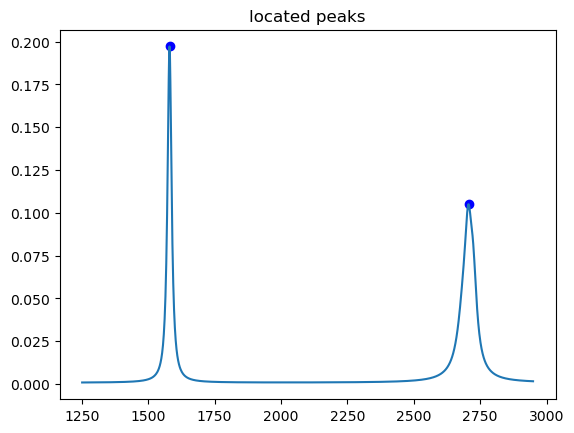

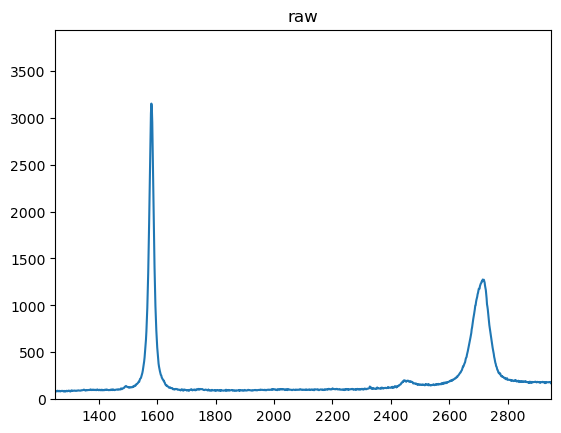

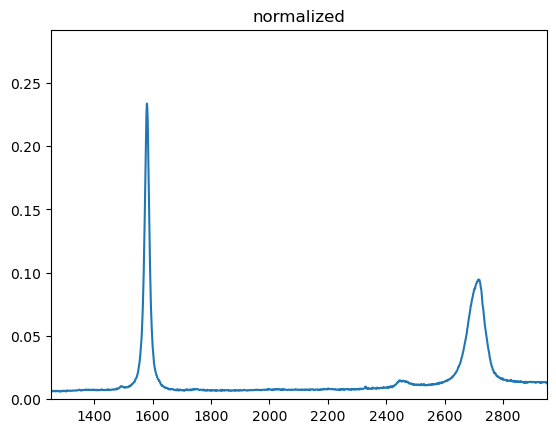

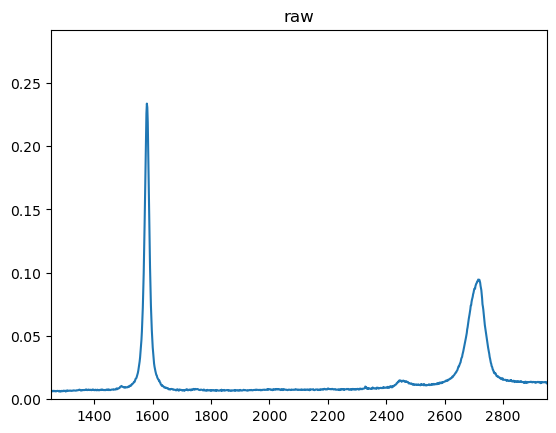

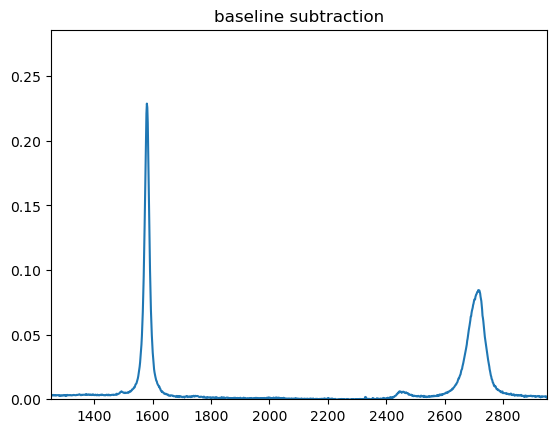

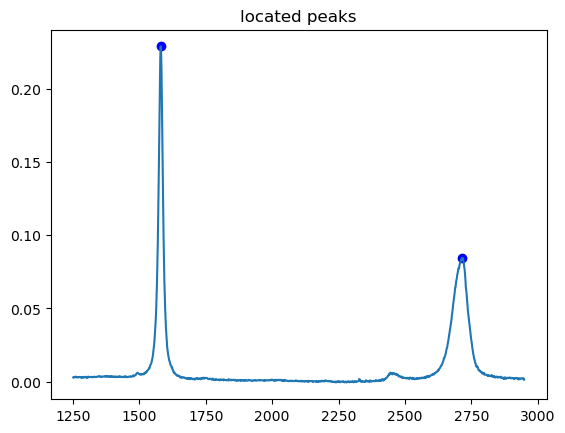

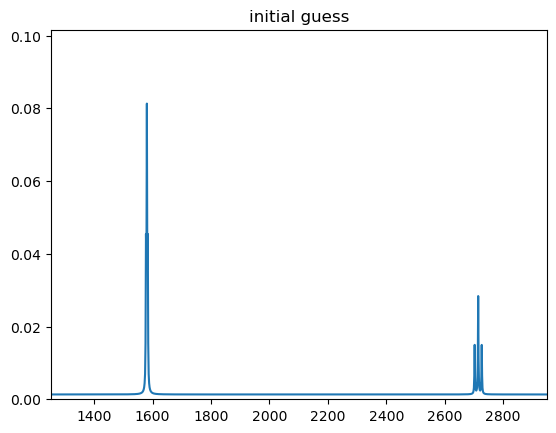

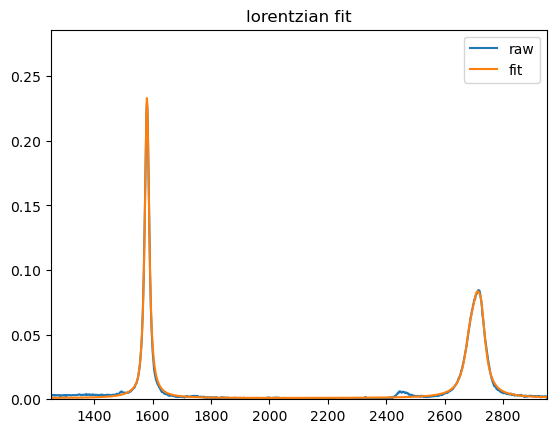

R^2 score: 0.9970240517427945


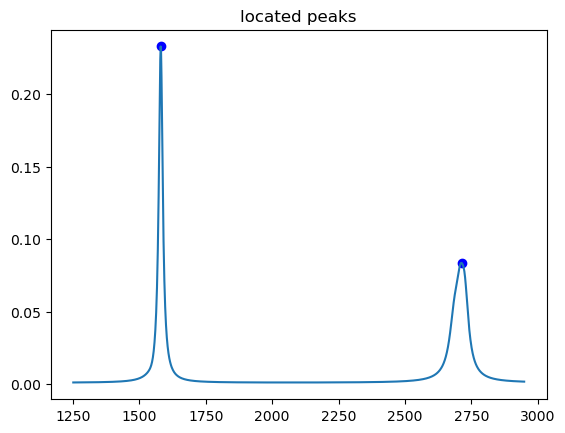

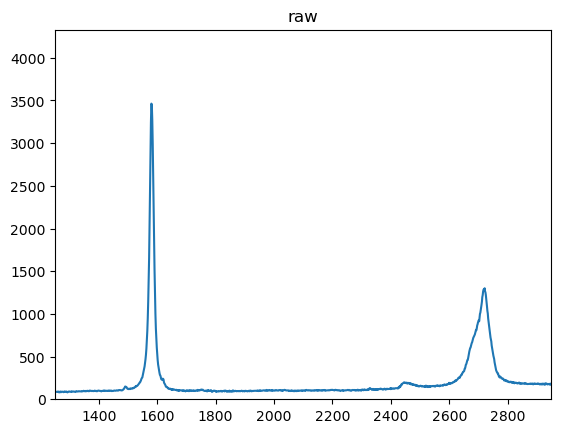

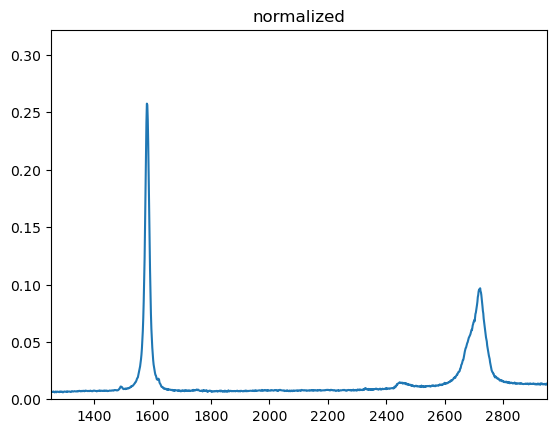

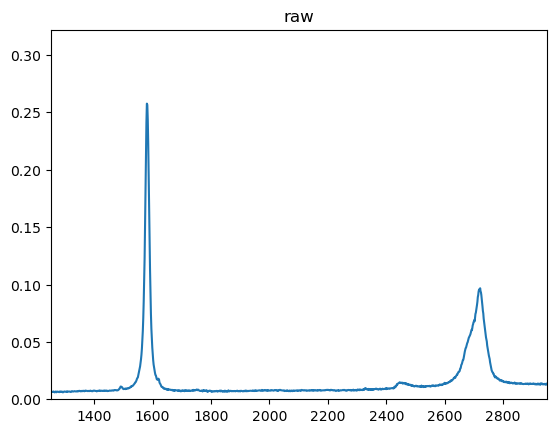

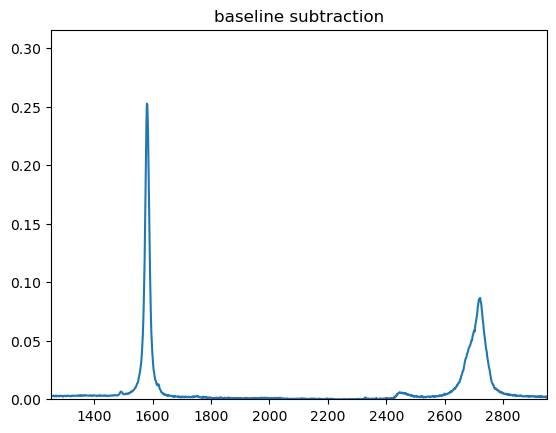

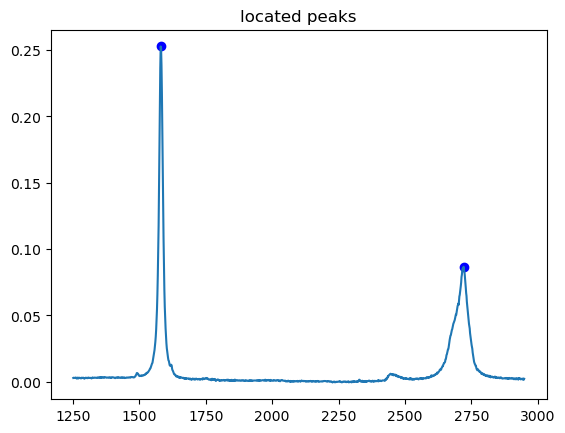

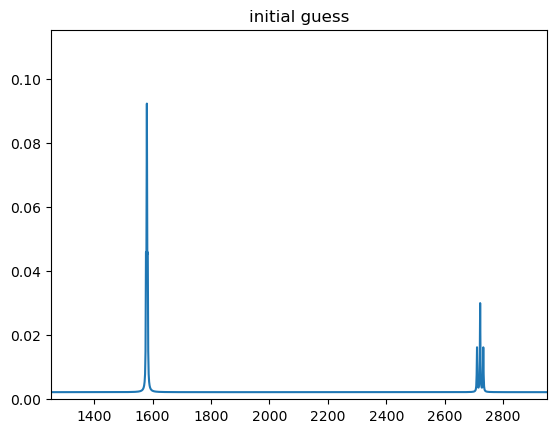

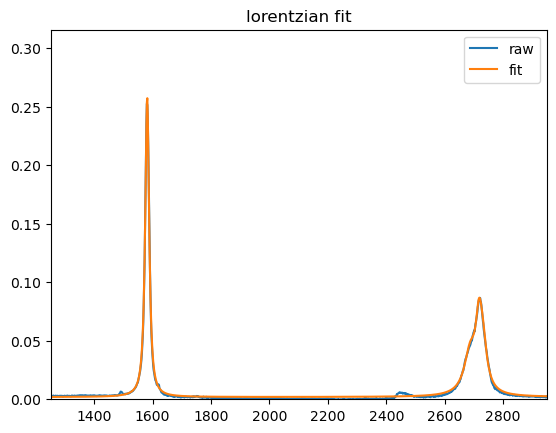

R^2 score: 0.9963957954882168


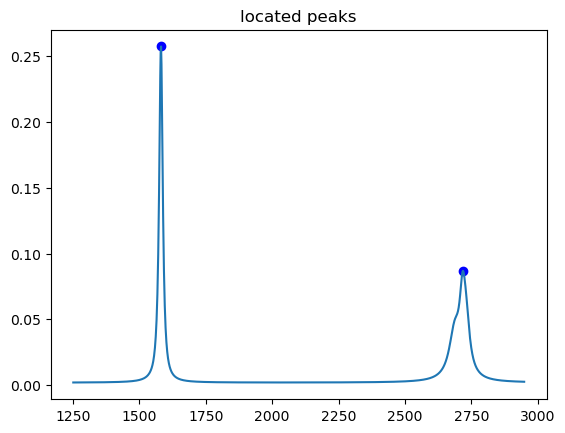

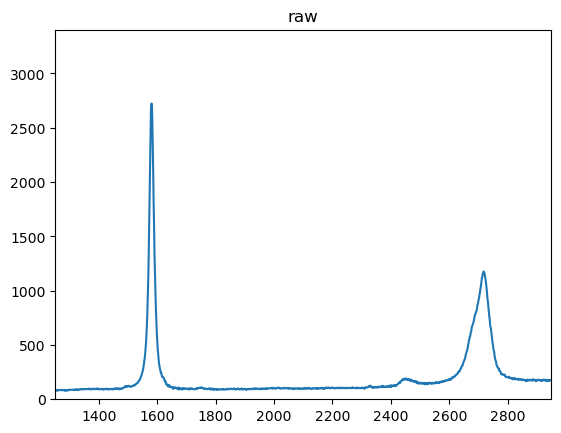

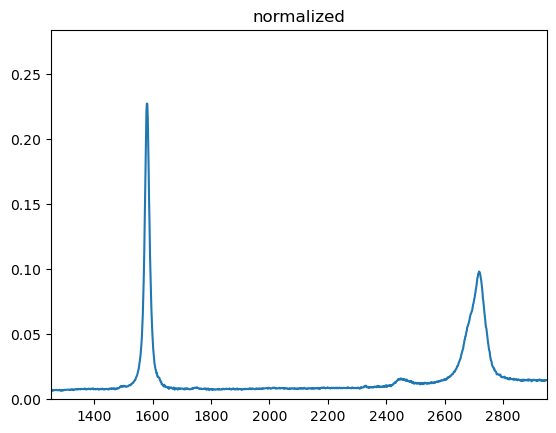

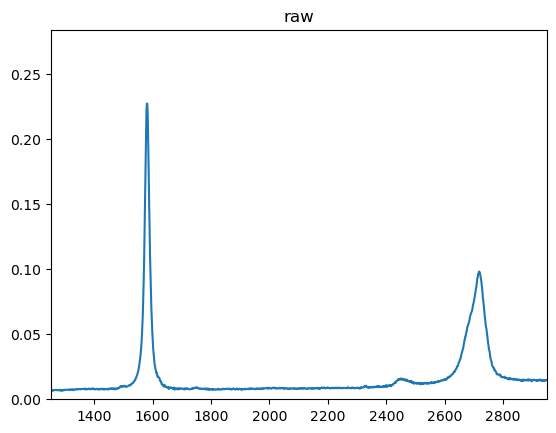

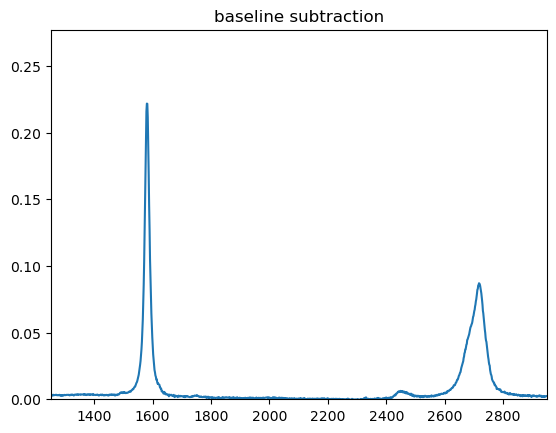

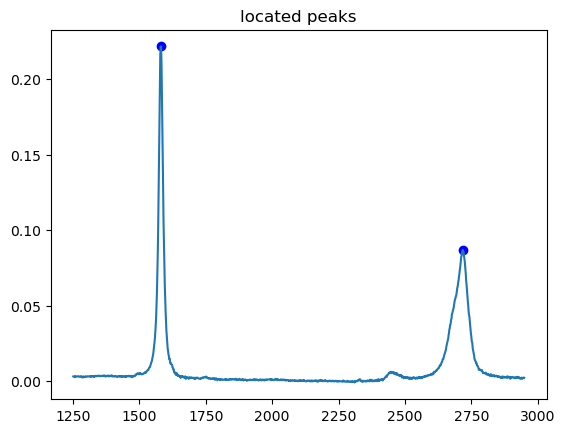

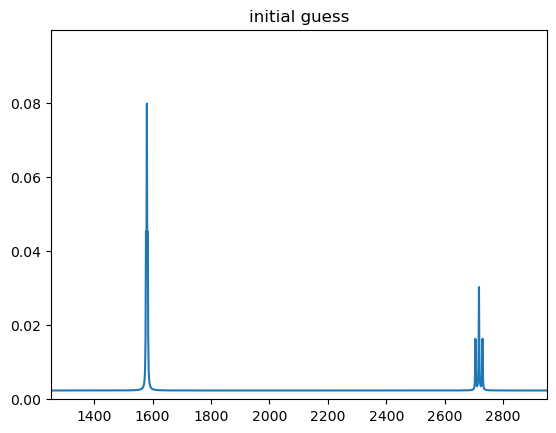

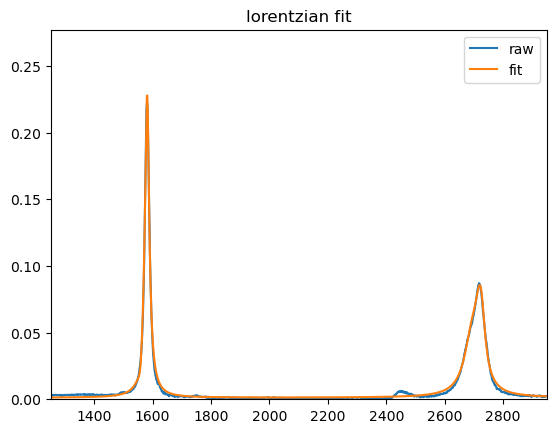

R^2 score: 0.9953369370540669


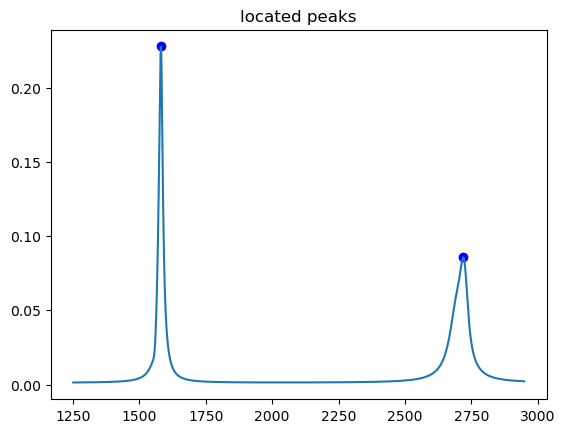

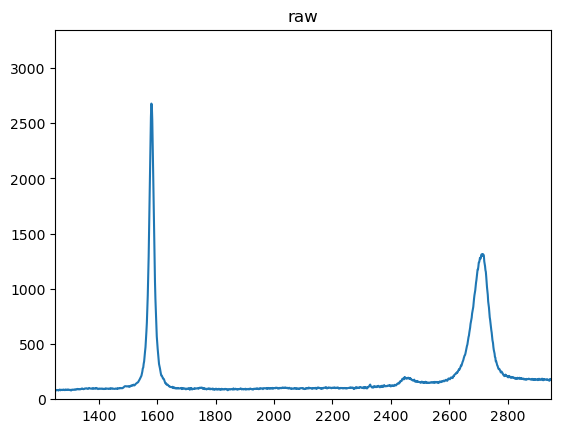

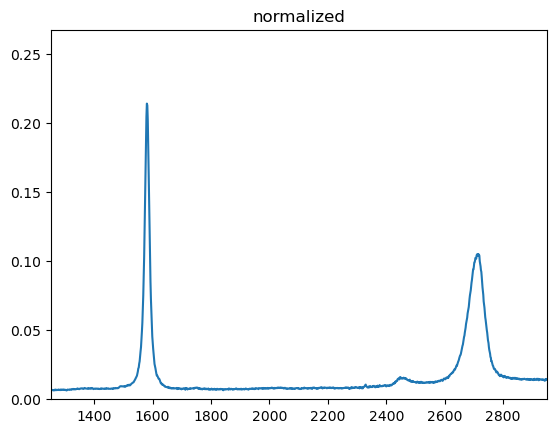

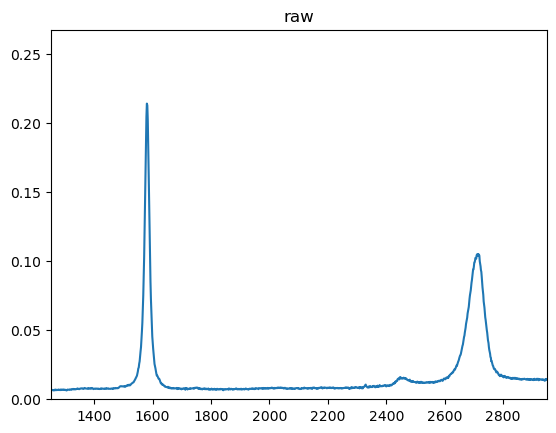

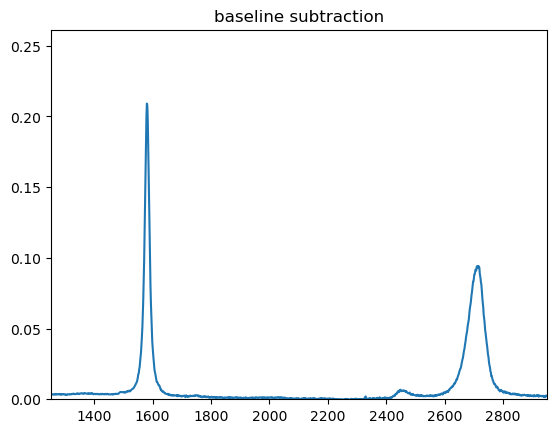

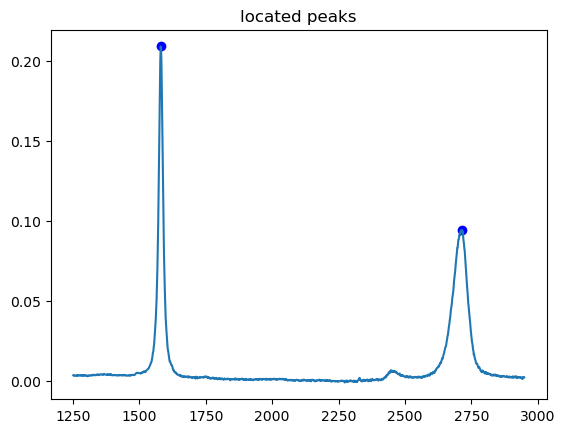

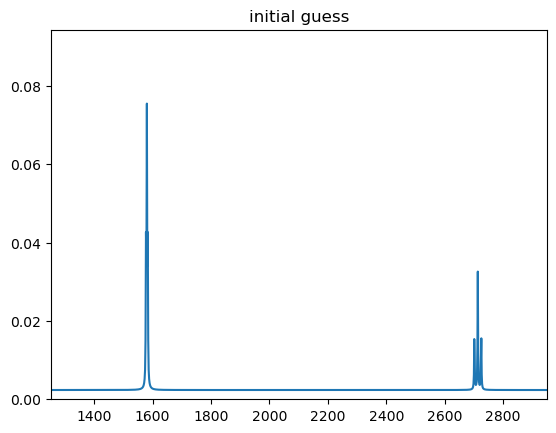

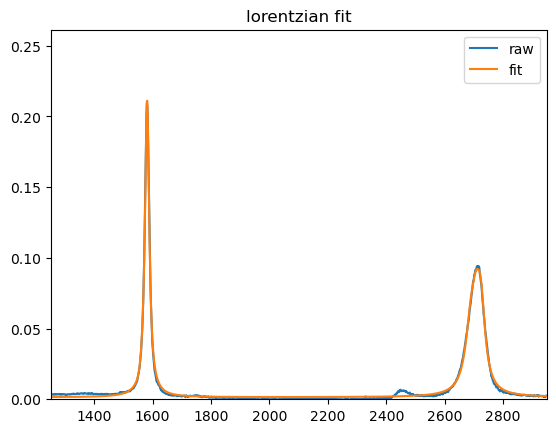

R^2 score: 0.9961557965759478


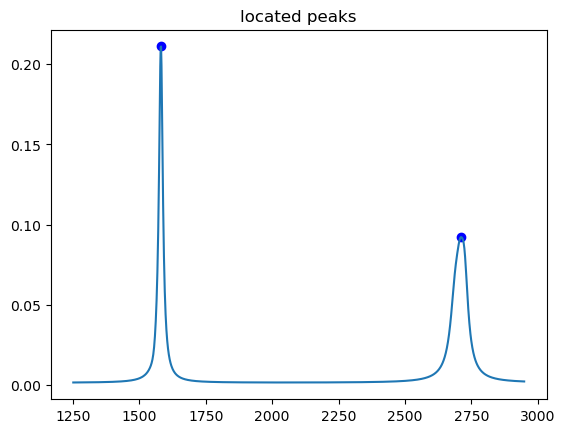

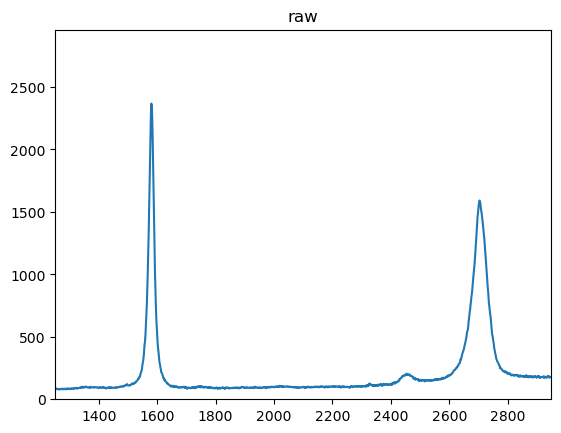

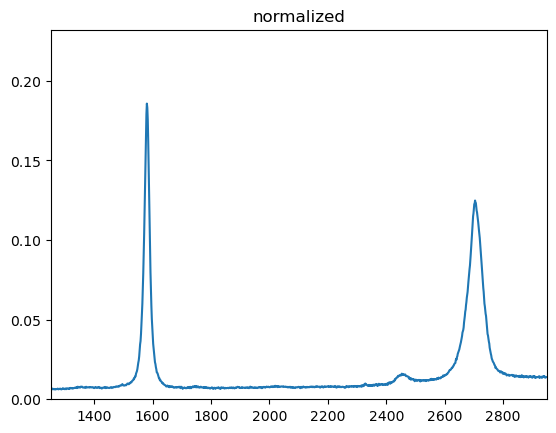

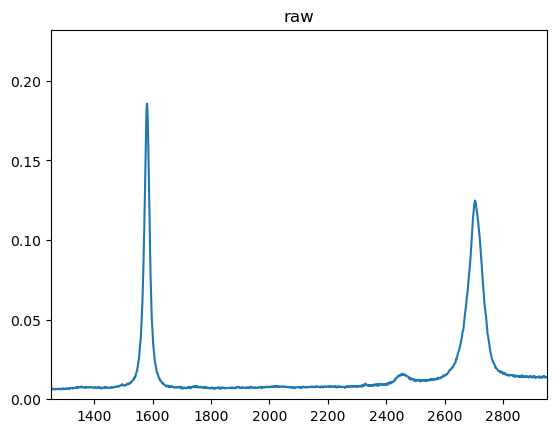

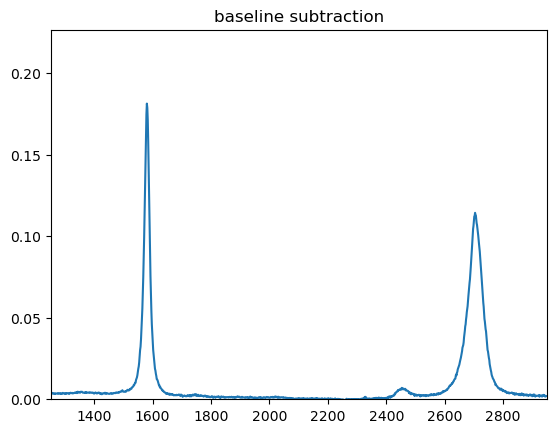

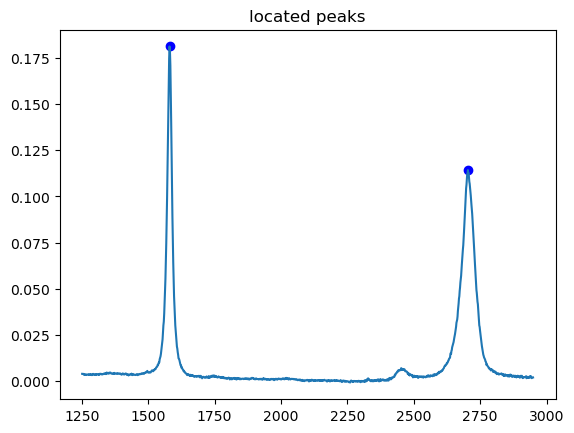

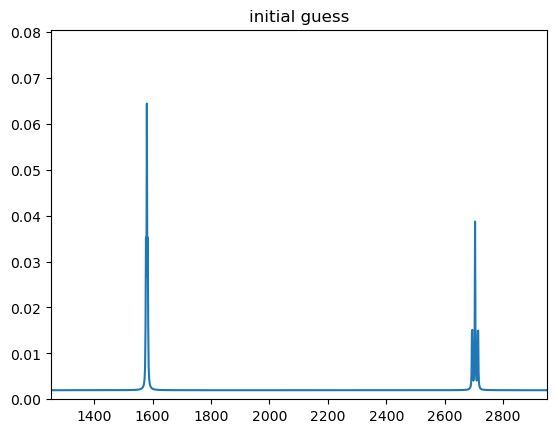

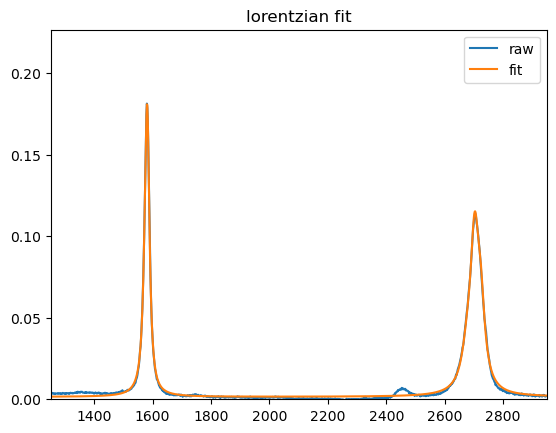

R^2 score: 0.996661194831978


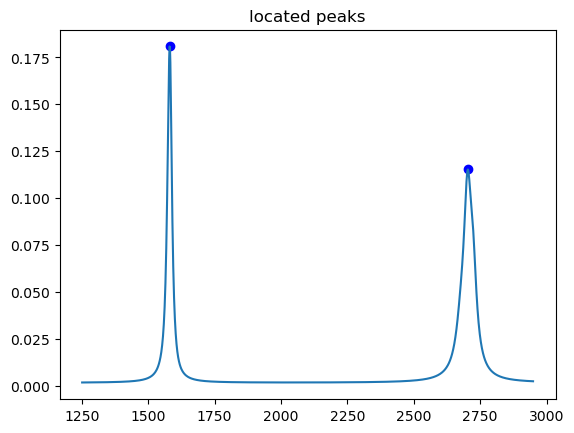

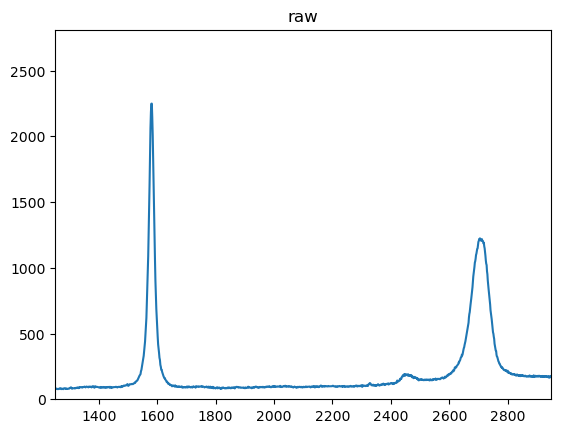

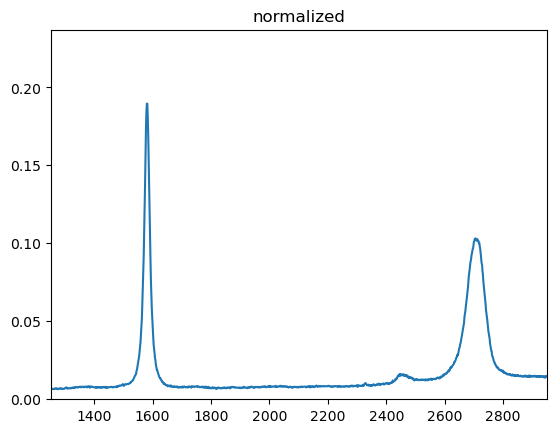

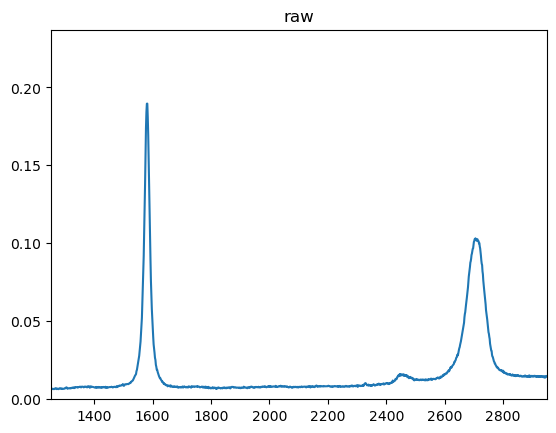

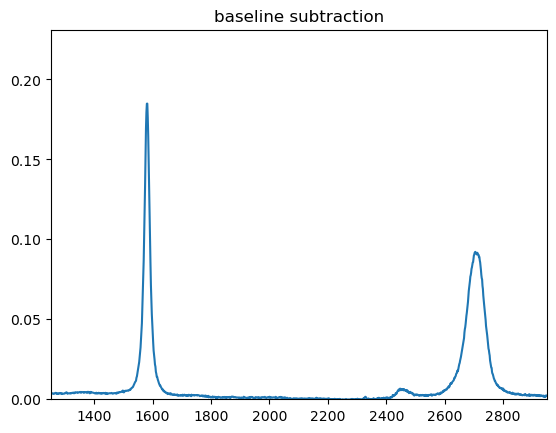

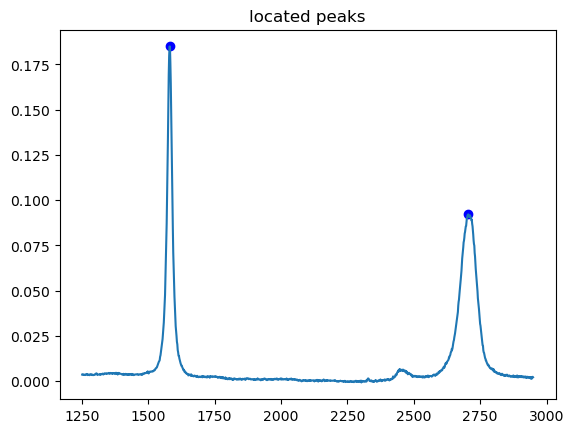

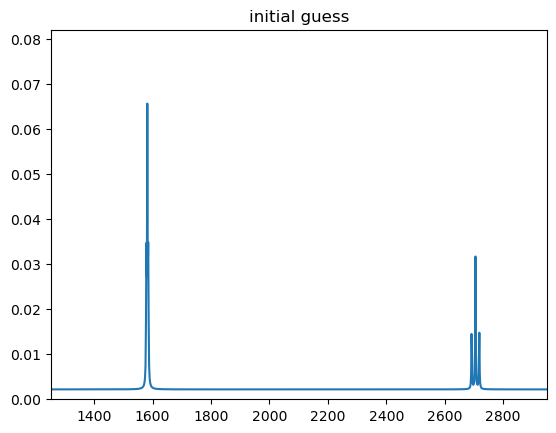

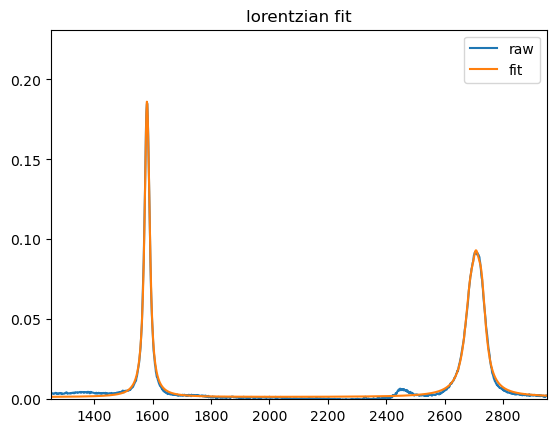

R^2 score: 0.9963228176702058


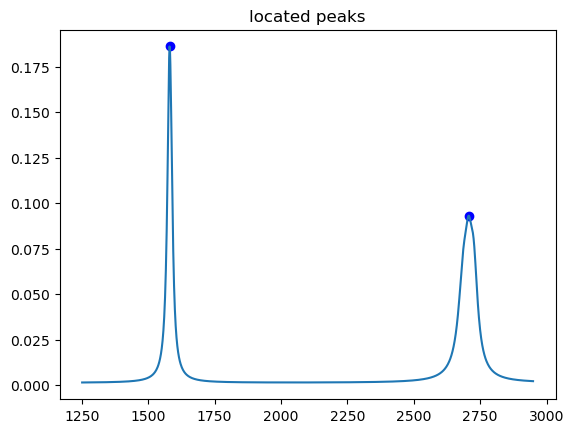

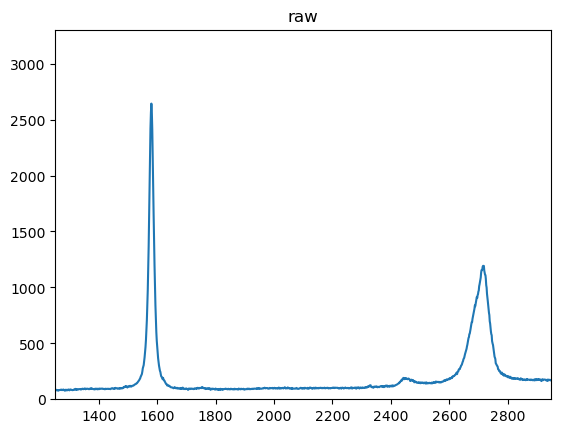

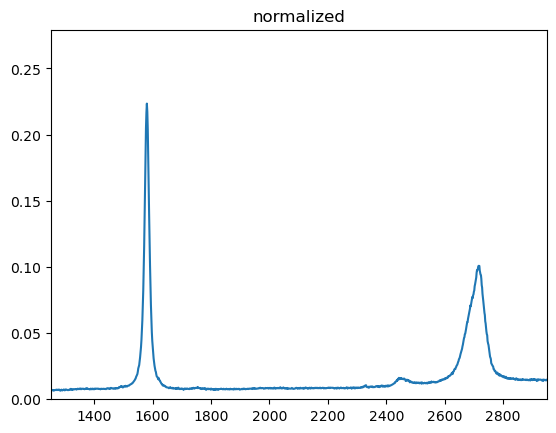

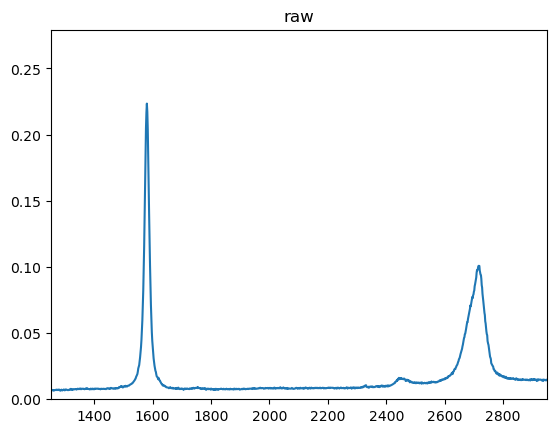

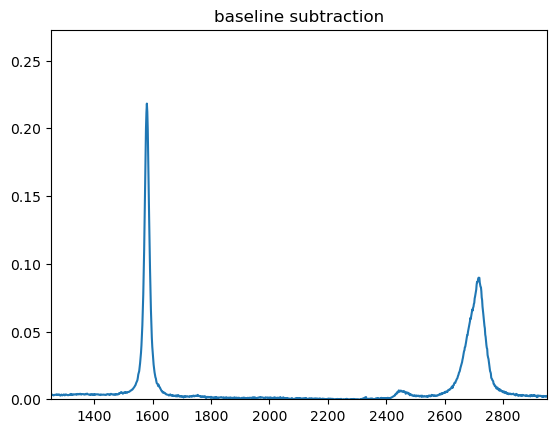

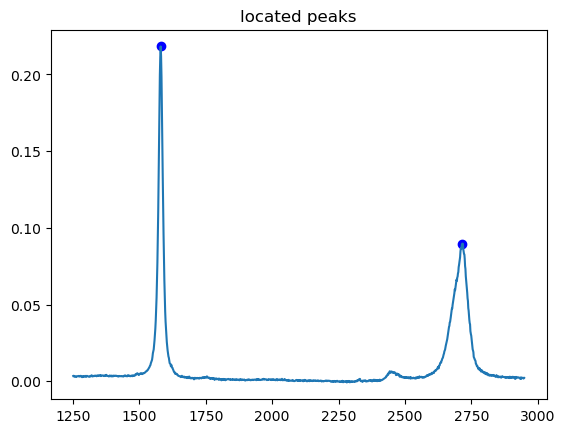

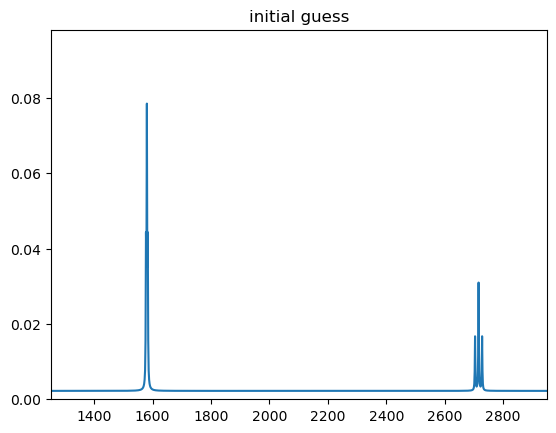

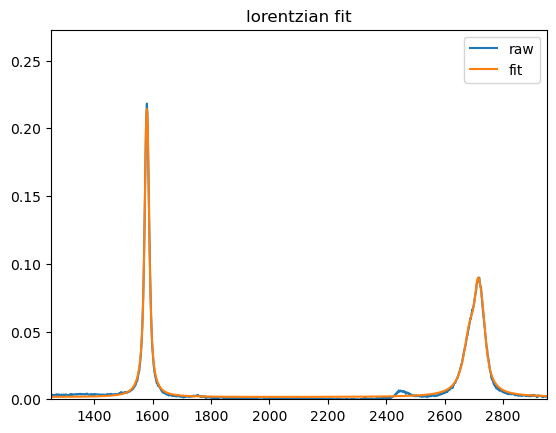

R^2 score: 0.9966617021043975


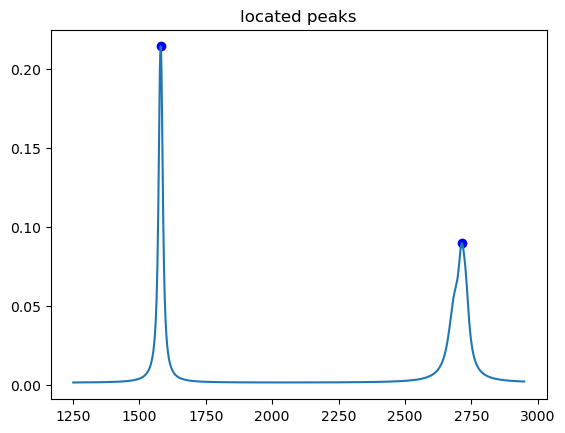

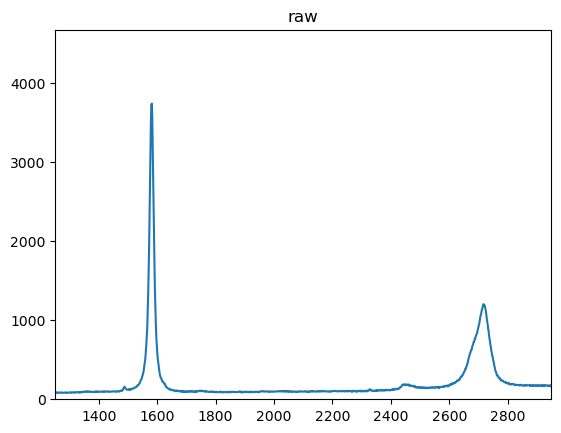

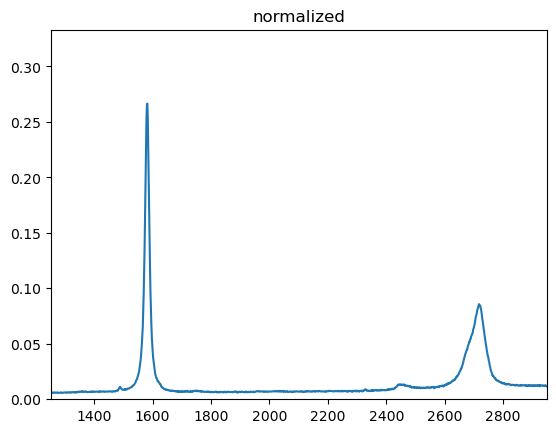

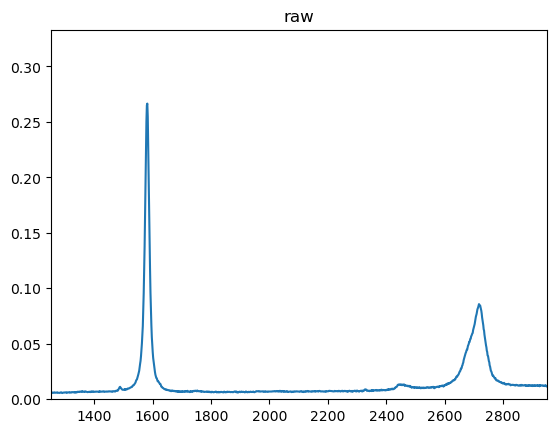

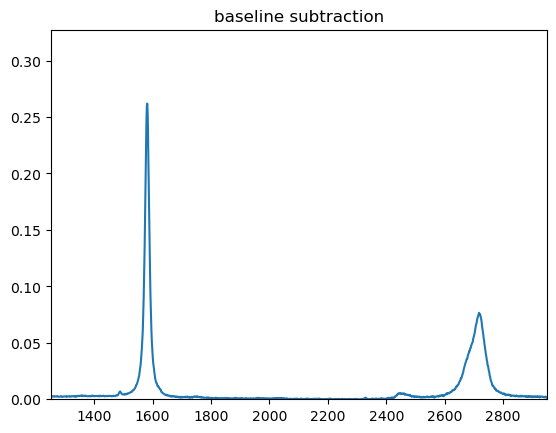

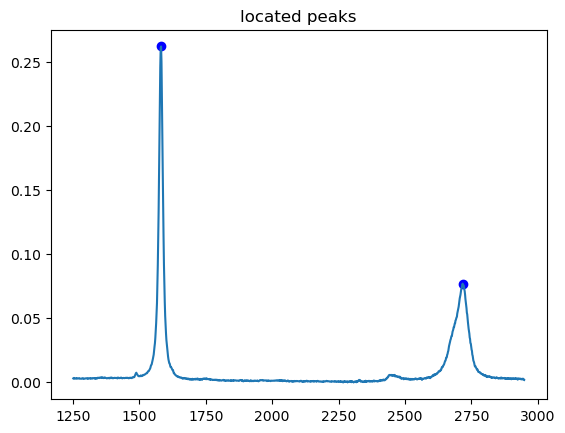

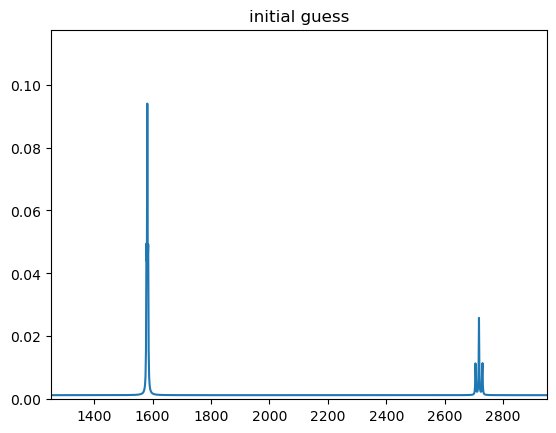

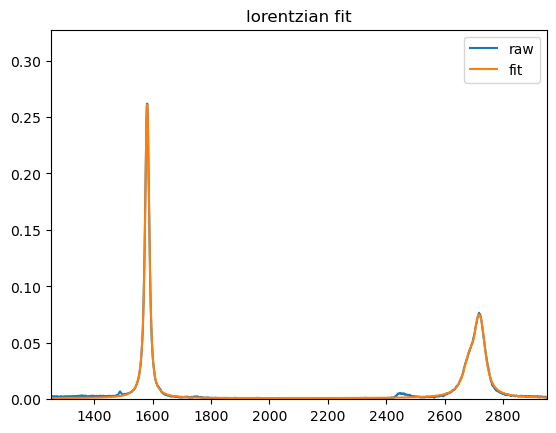

R^2 score: 0.9983421643682986


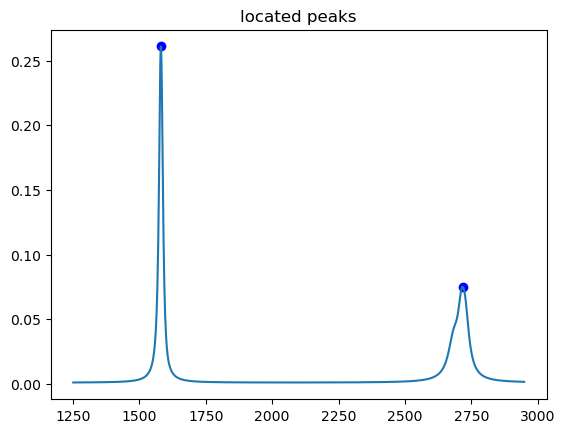

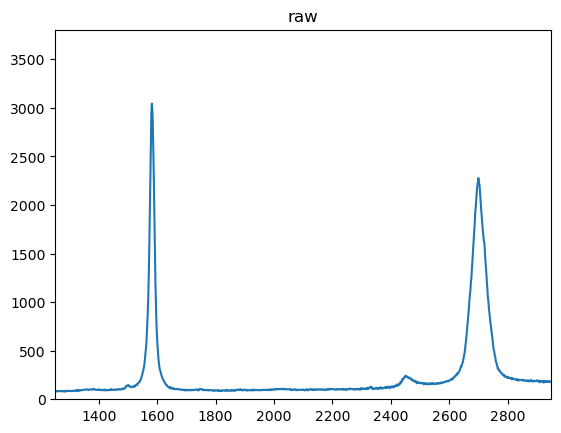

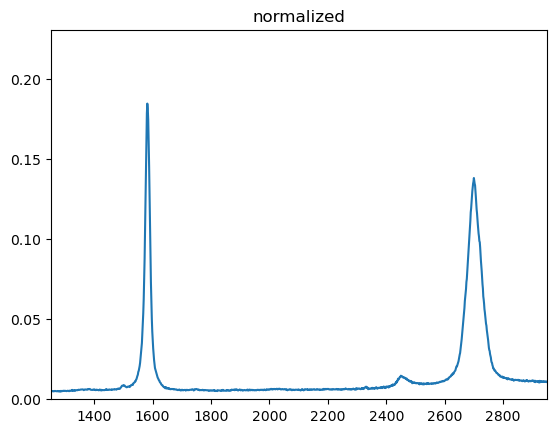

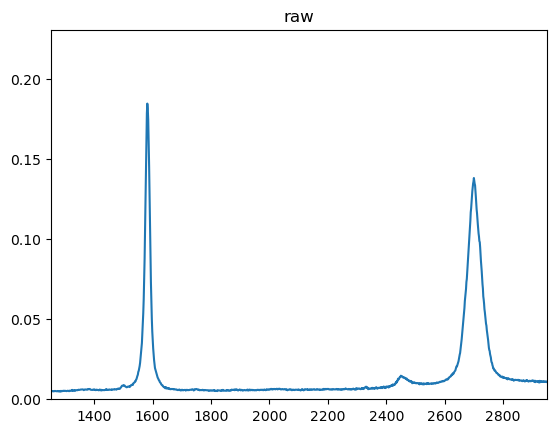

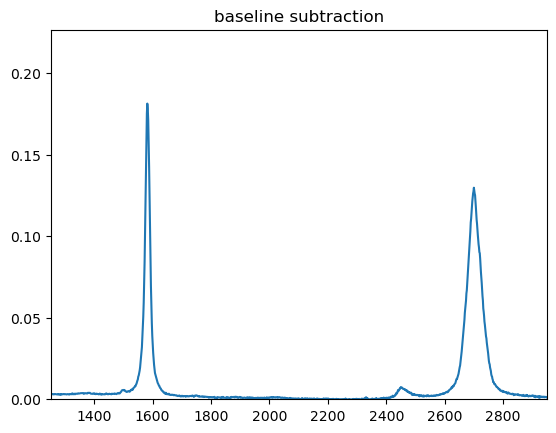

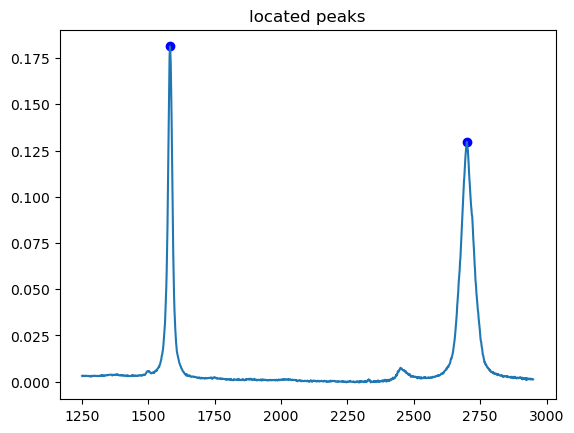

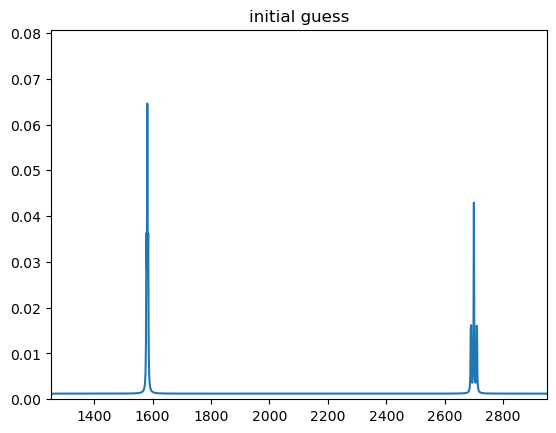

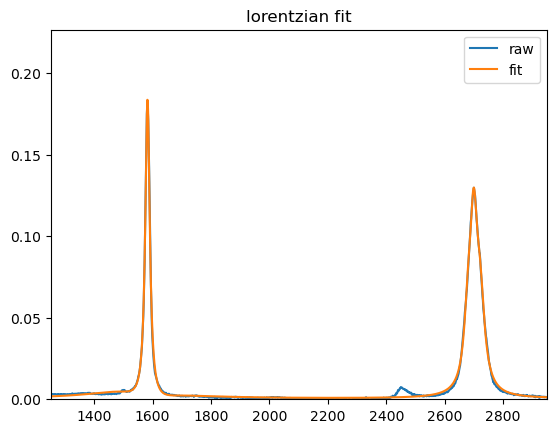

R^2 score: 0.9974600167392303


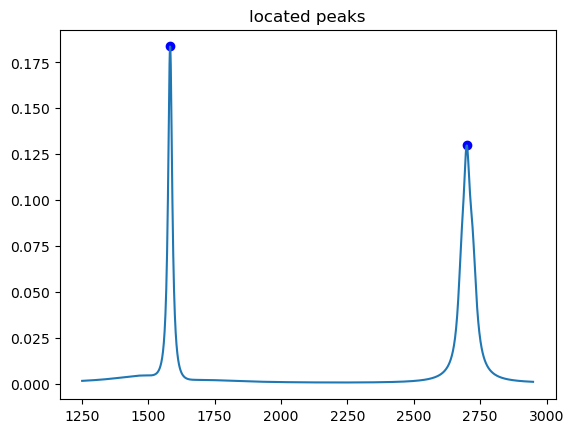

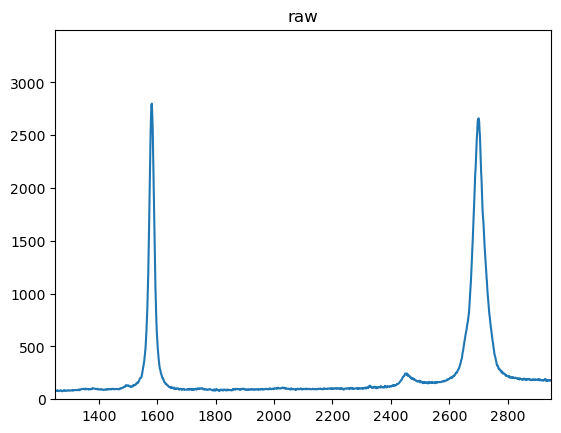

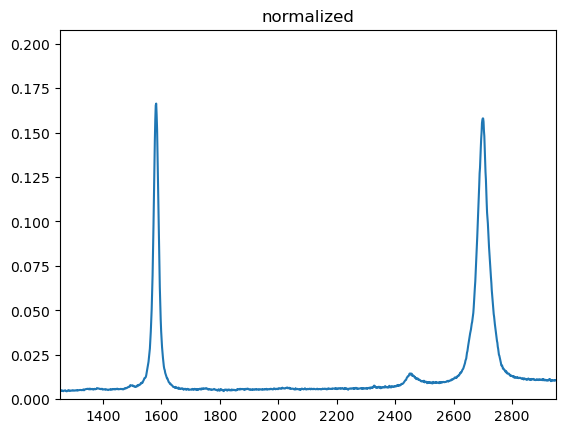

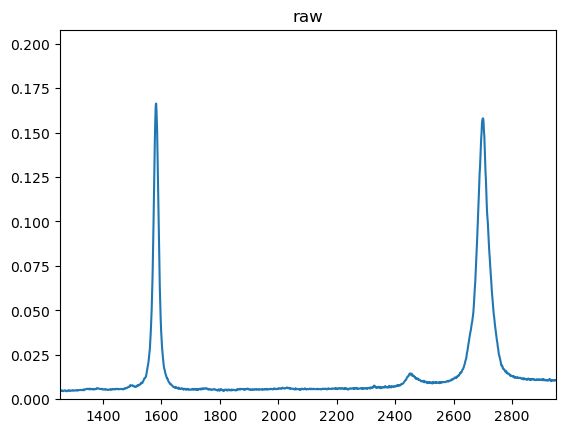

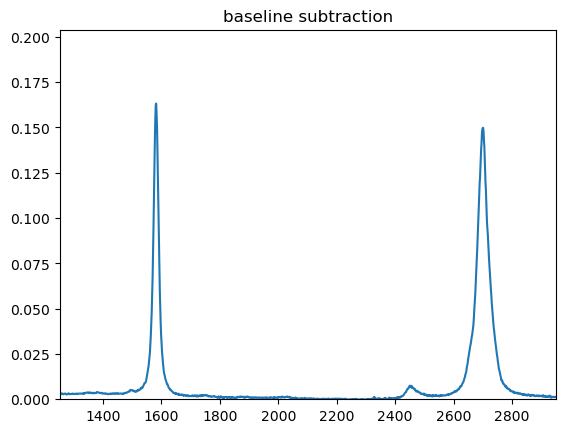

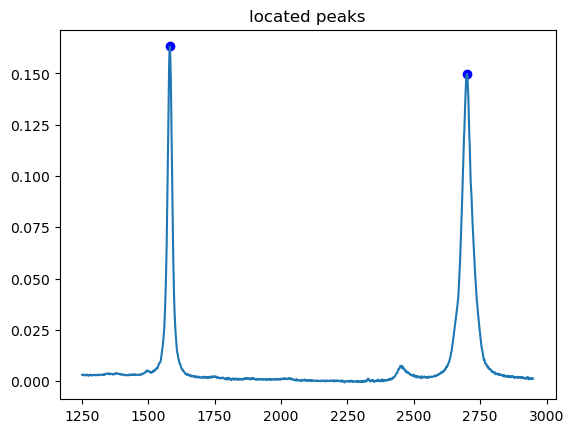

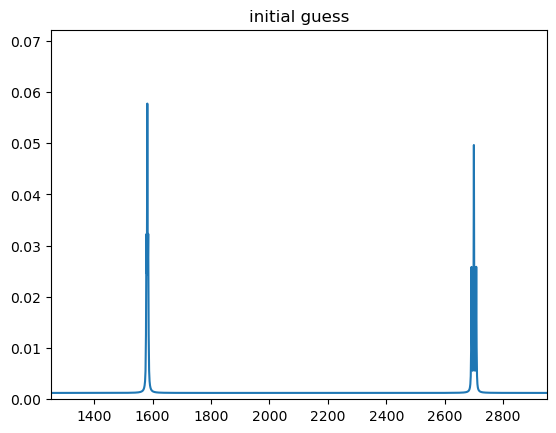

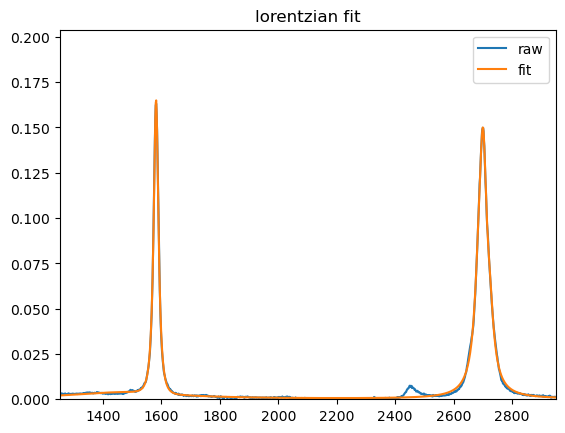

R^2 score: 0.9980603694895429


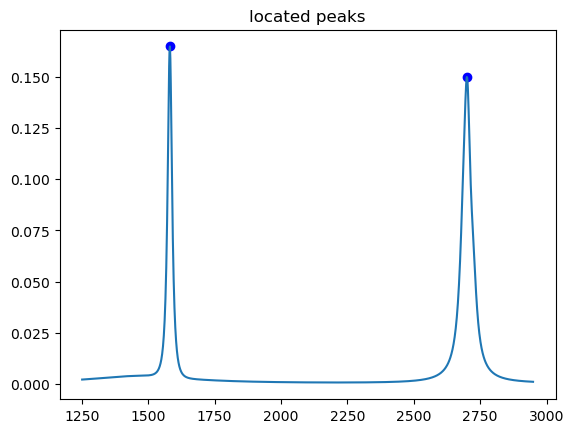

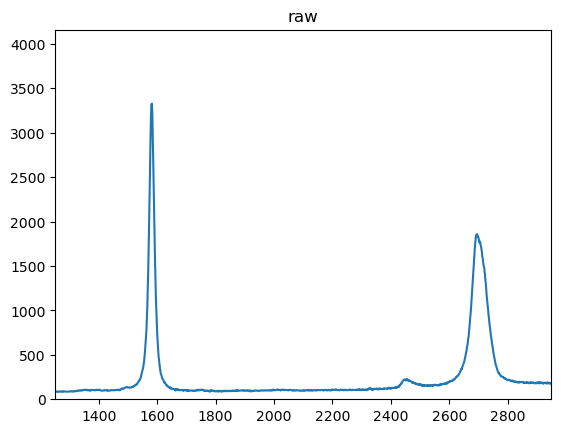

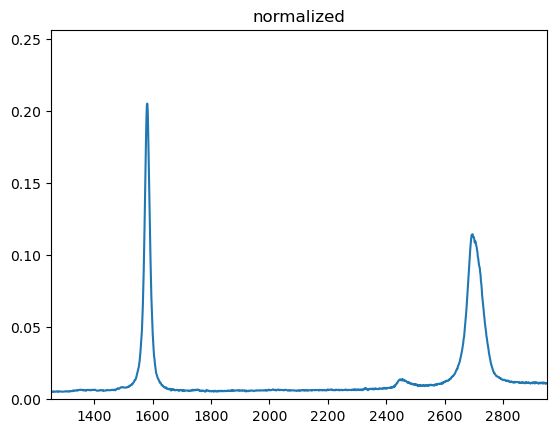

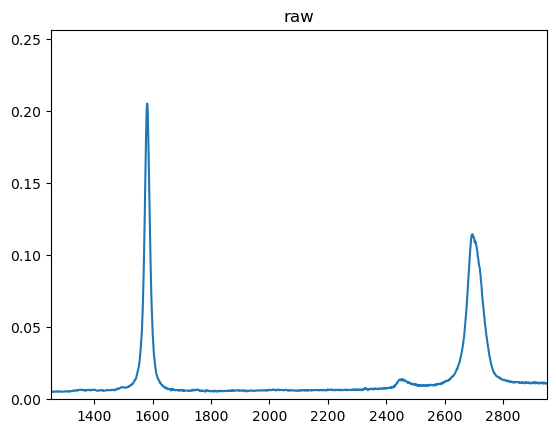

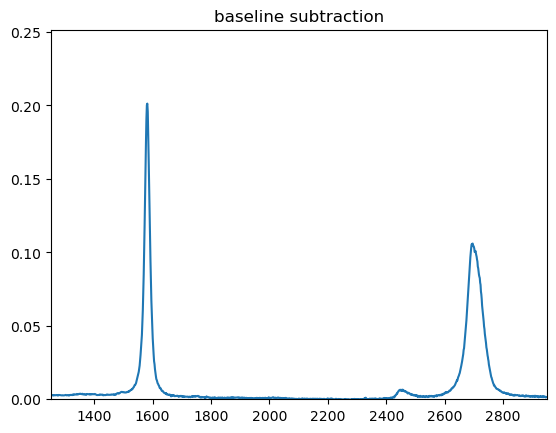

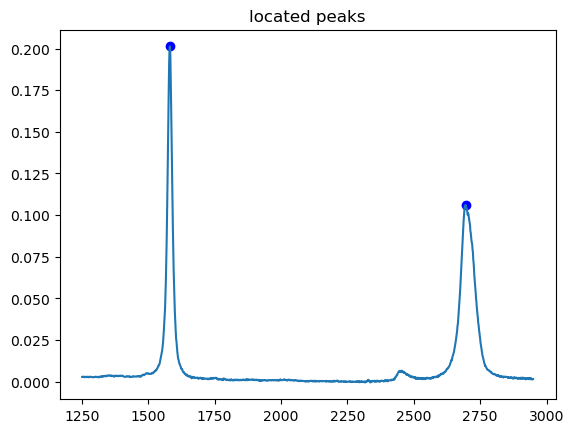

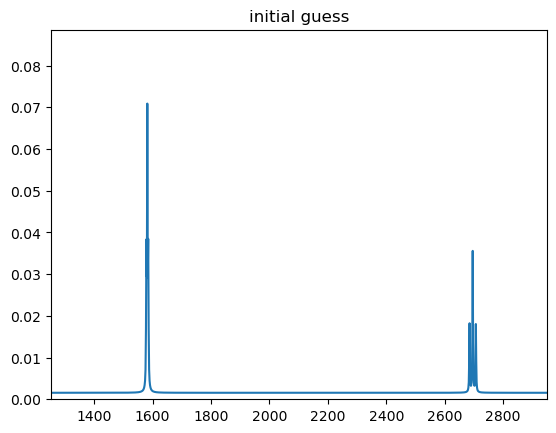

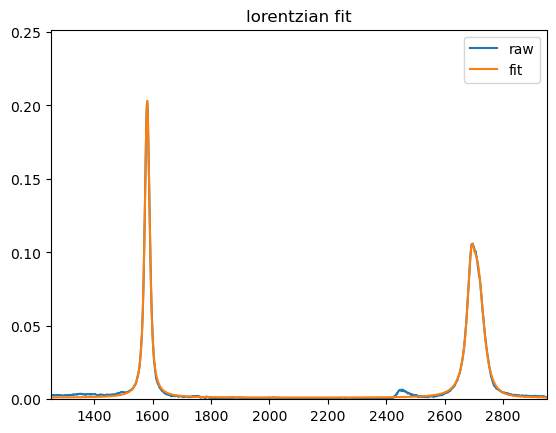

R^2 score: 0.997840334986806


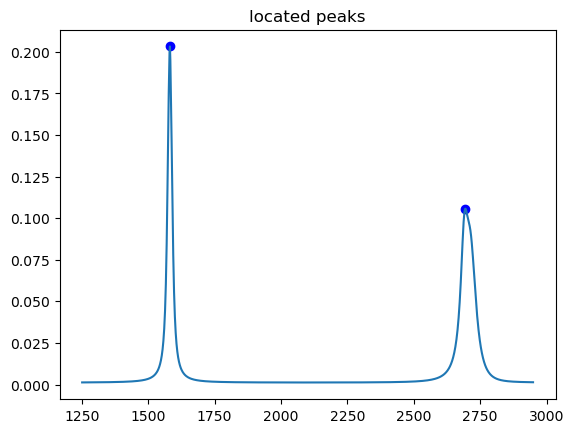

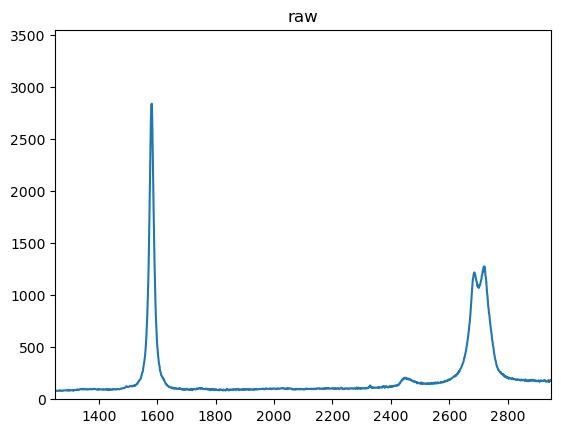

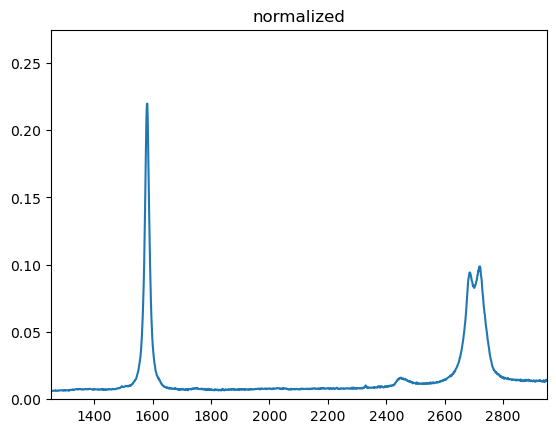

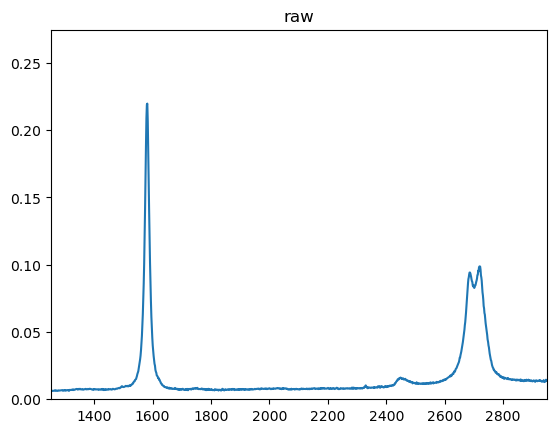

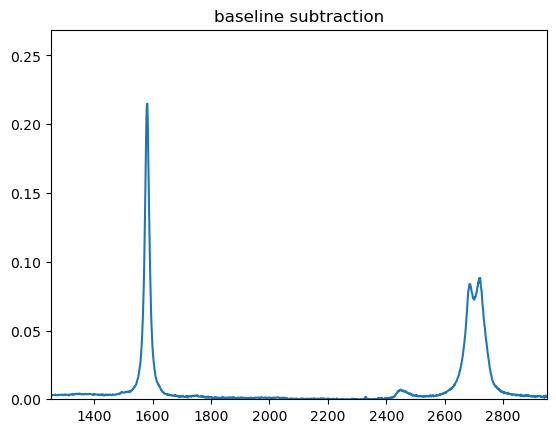

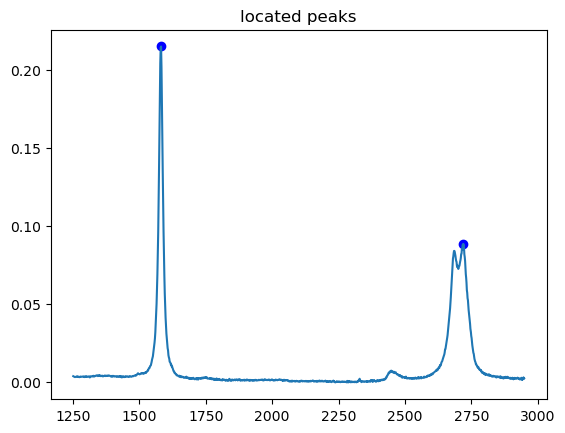

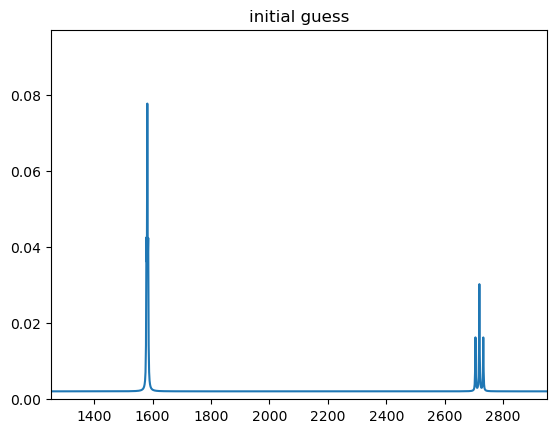

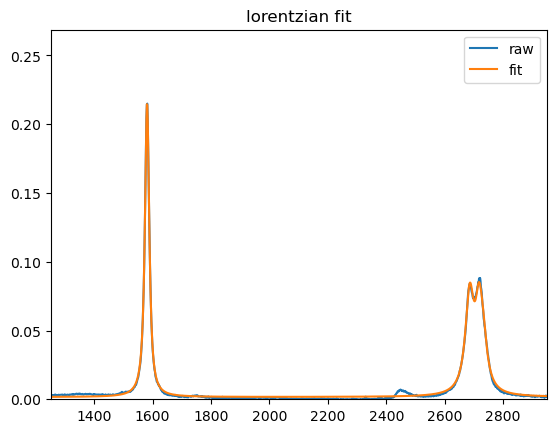

R^2 score: 0.9967946461430077


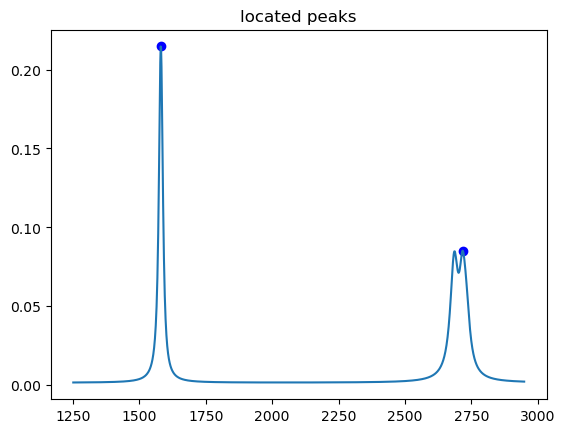

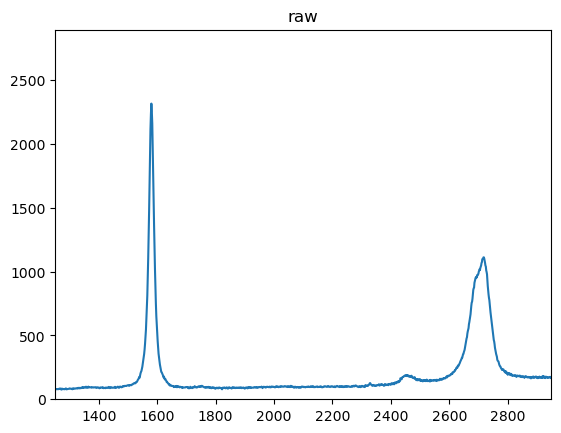

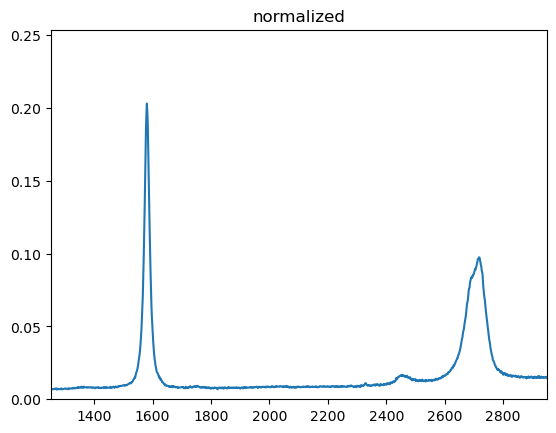

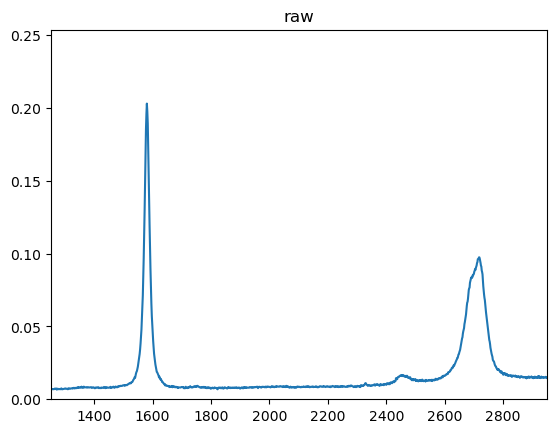

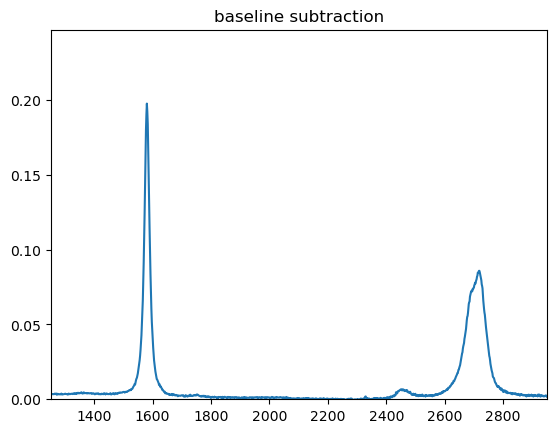

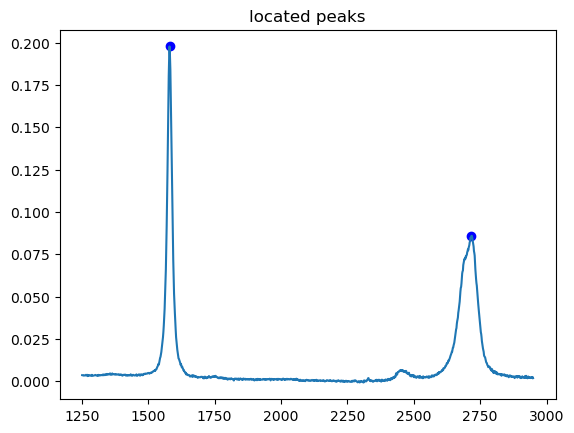

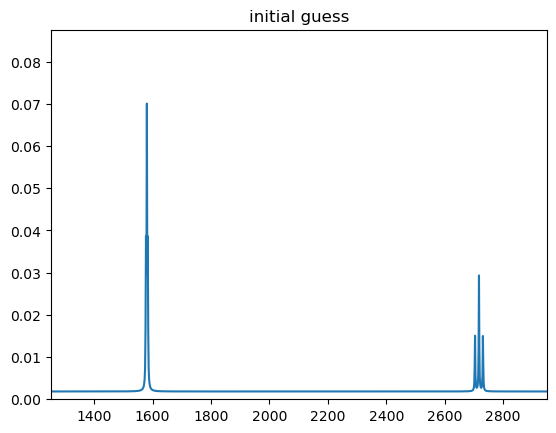

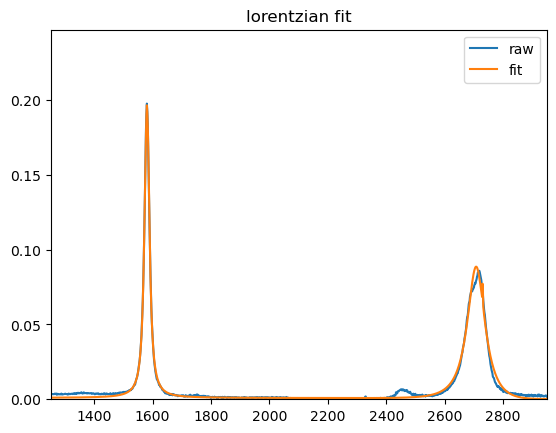

R^2 score: 0.9920016063775795


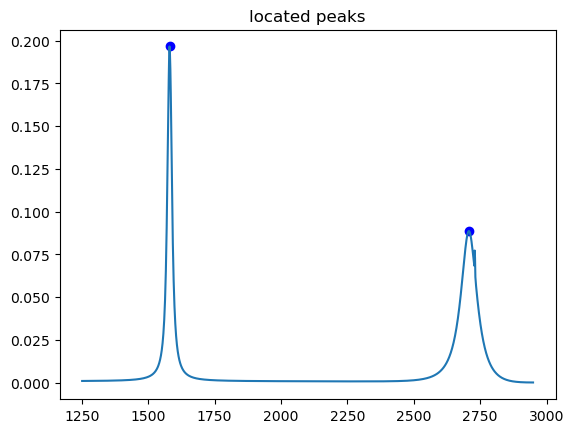

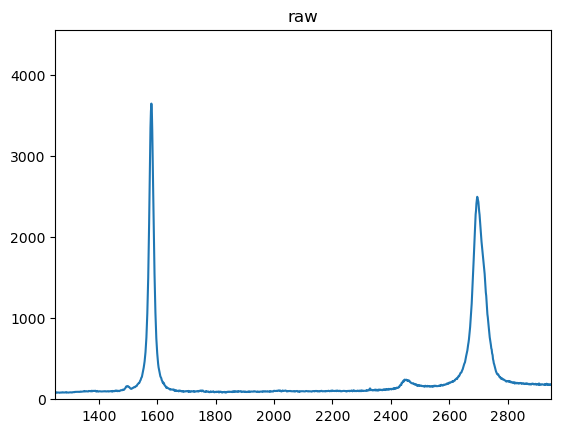

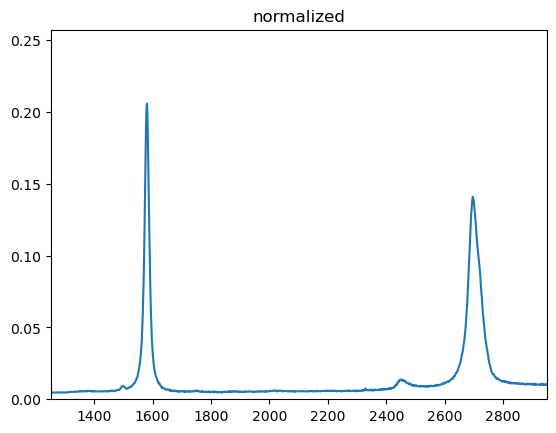

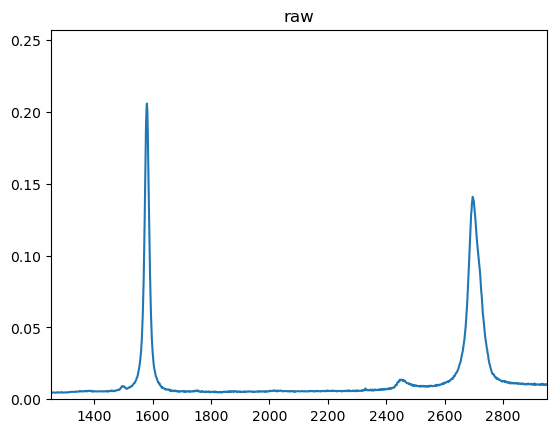

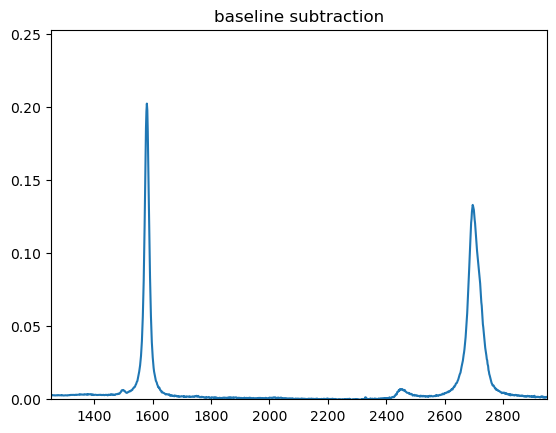

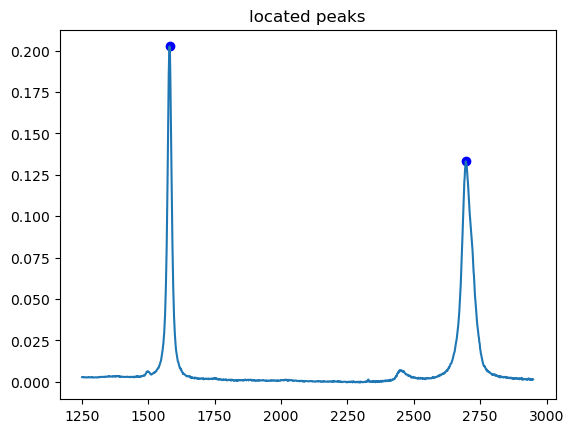

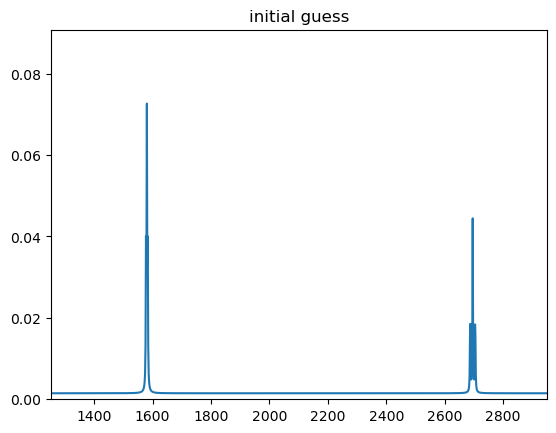

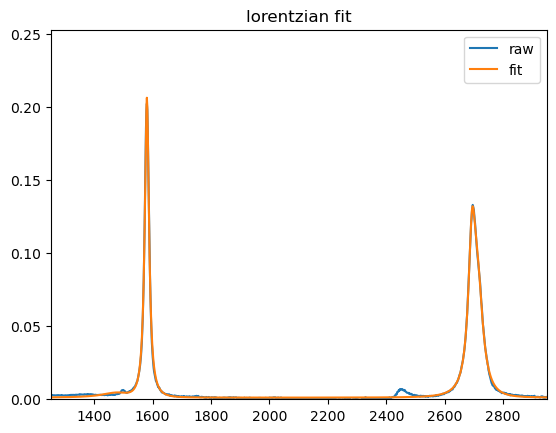

R^2 score: 0.997838634246143


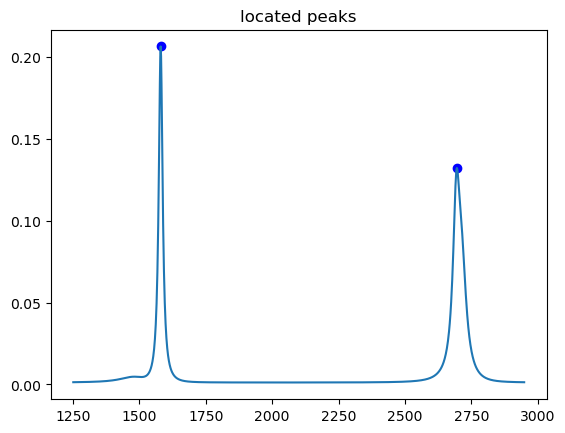

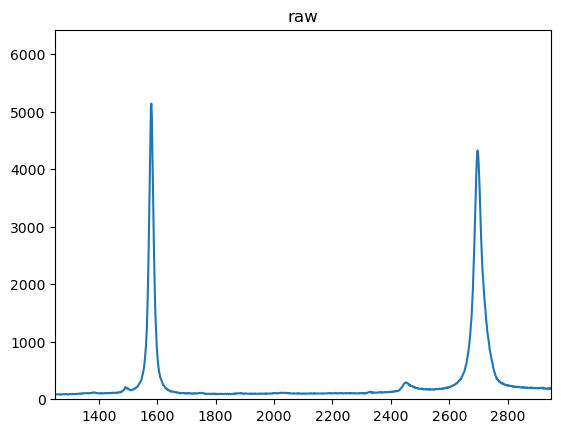

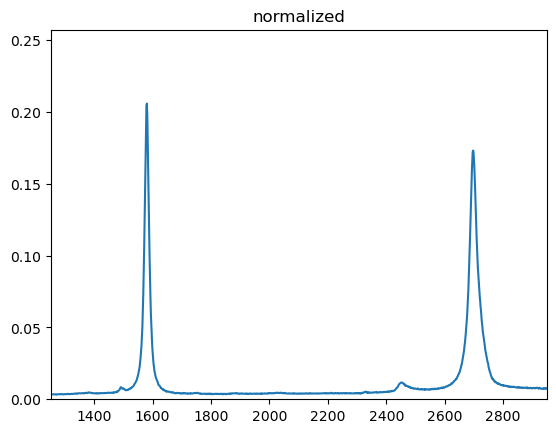

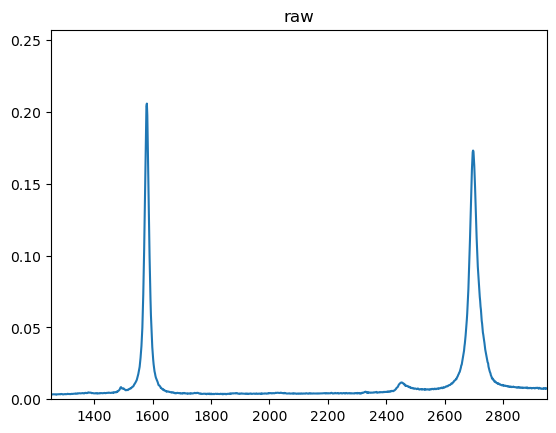

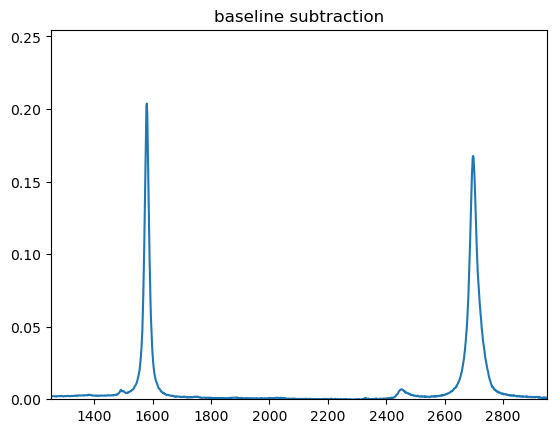

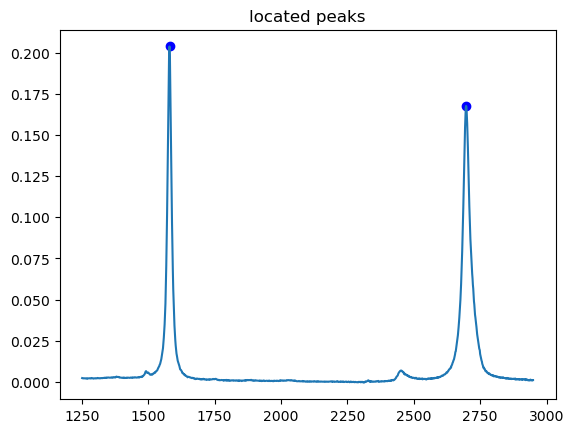

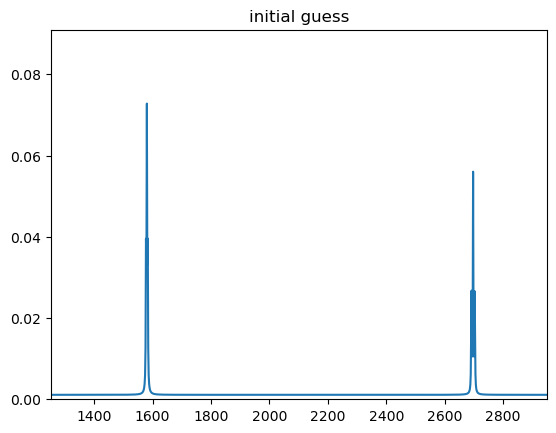

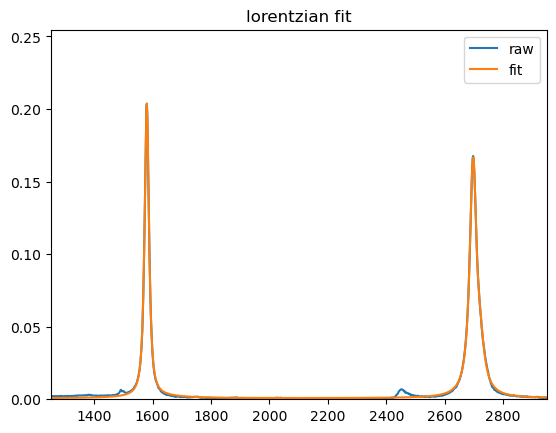

R^2 score: 0.9983259690120849


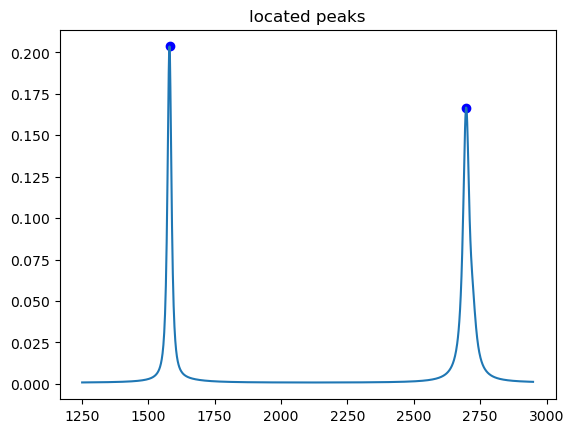

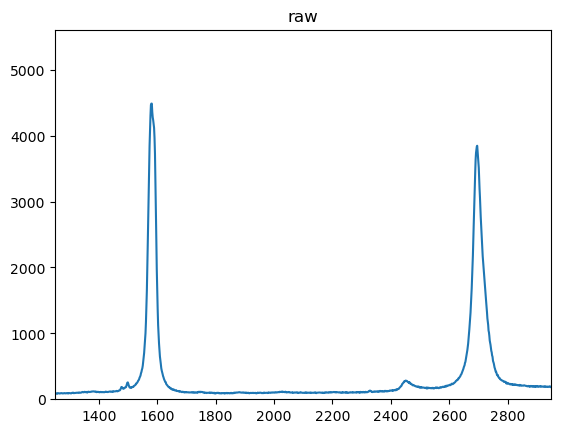

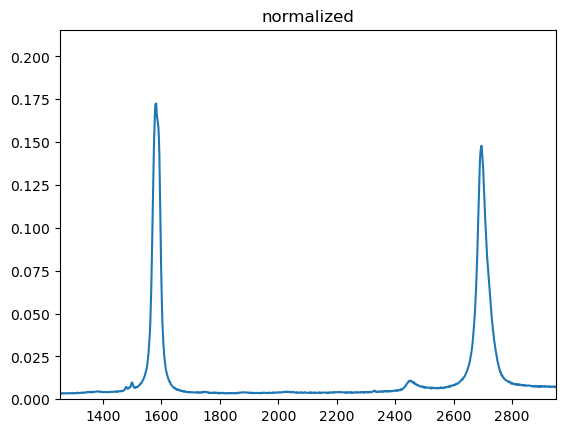

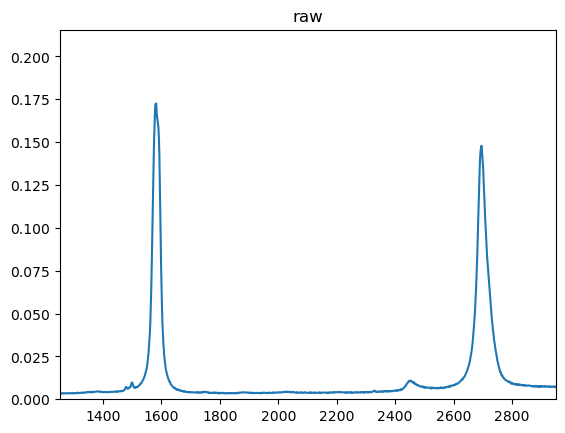

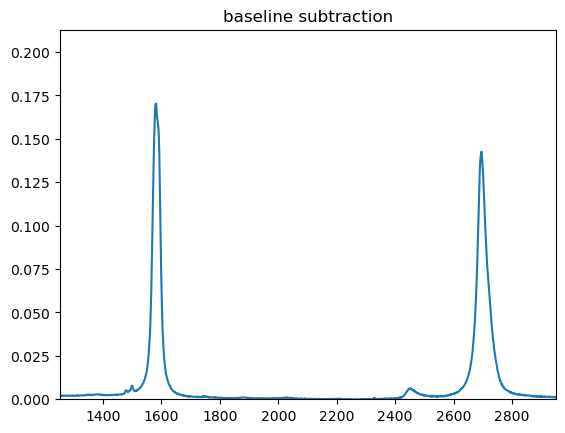

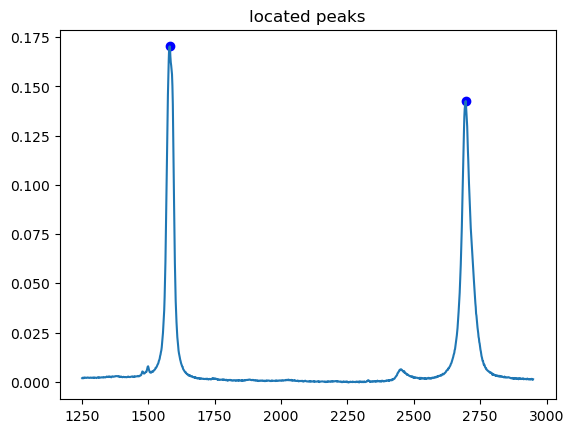

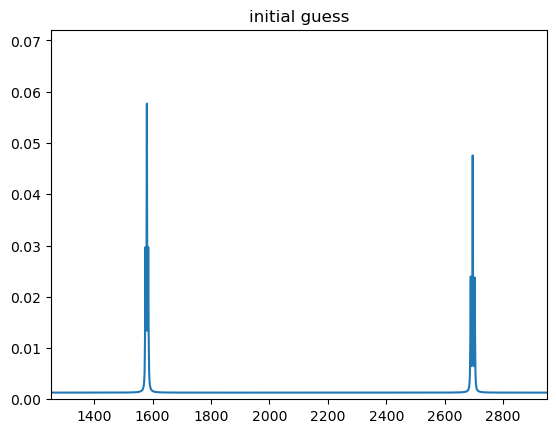

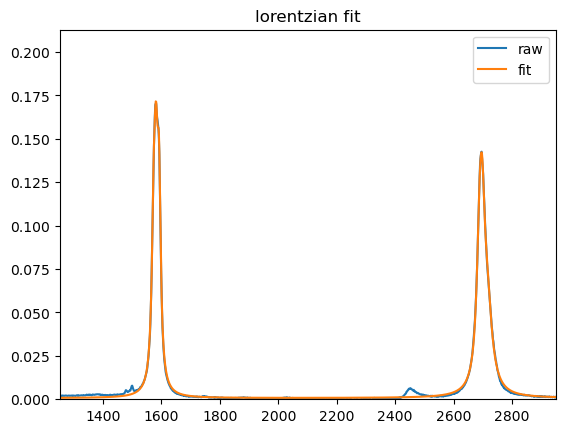

R^2 score: 0.9982724093065144


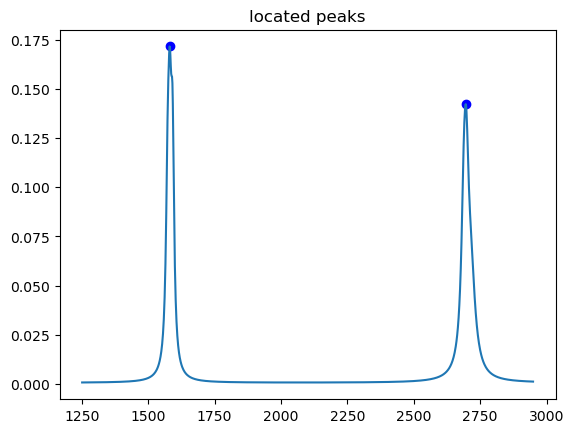

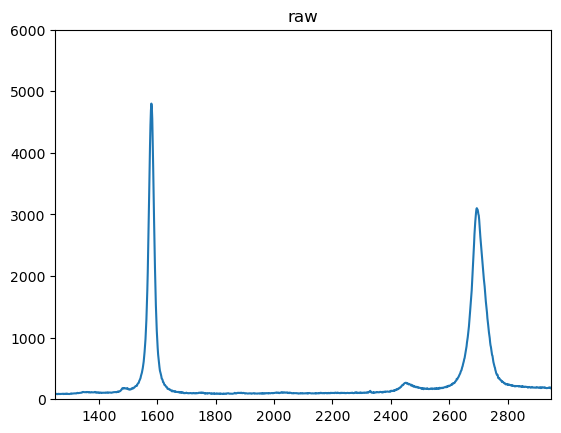

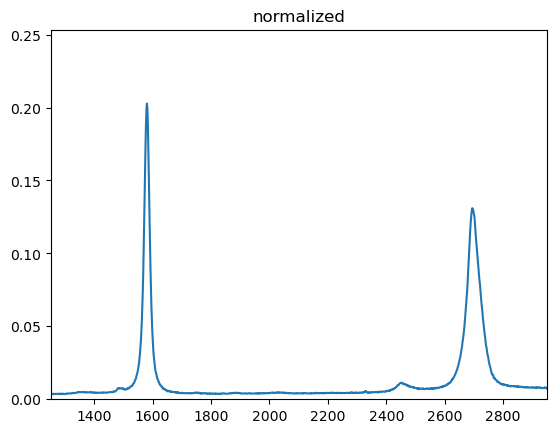

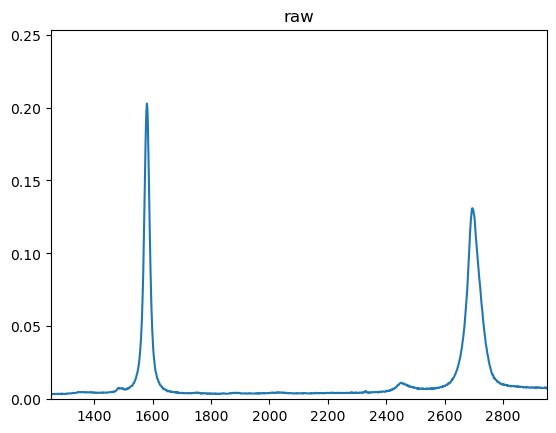

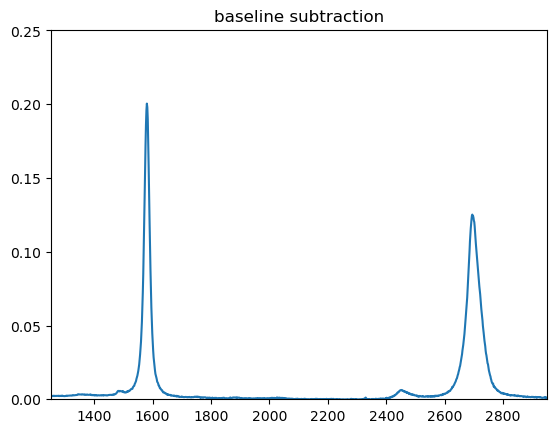

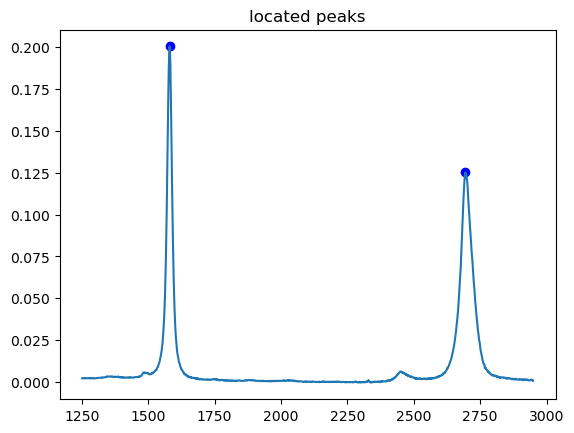

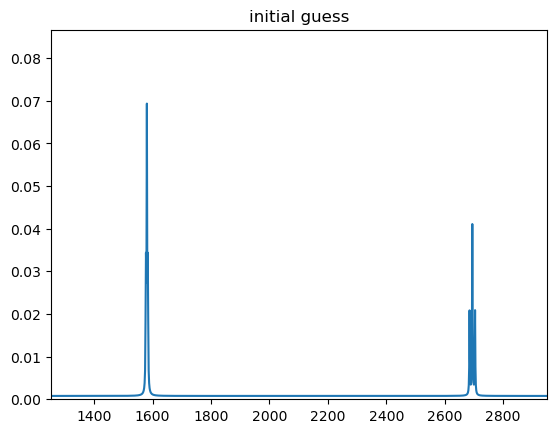

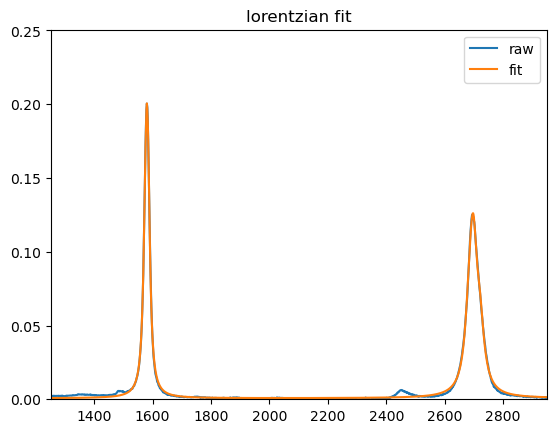

R^2 score: 0.9978167731700037


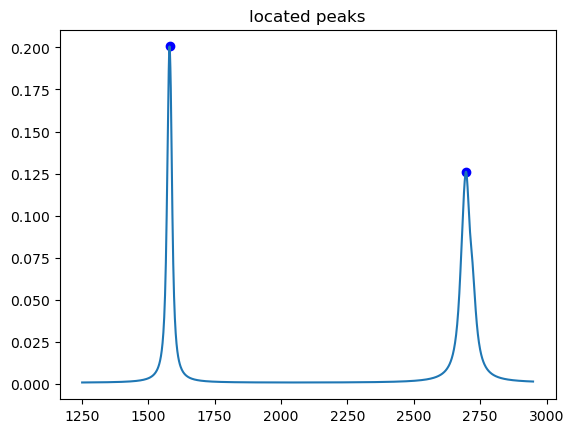

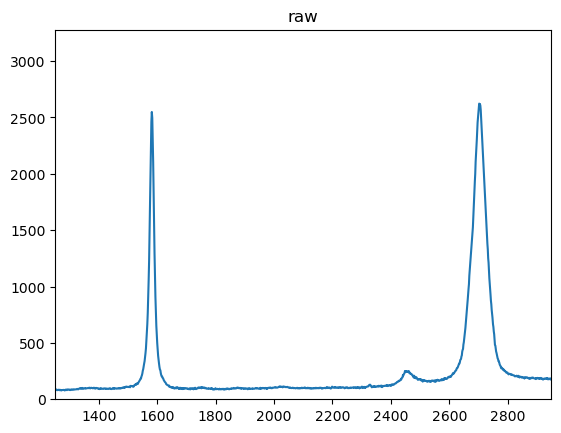

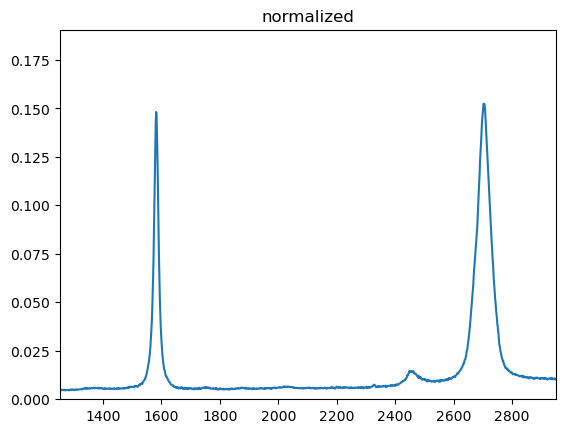

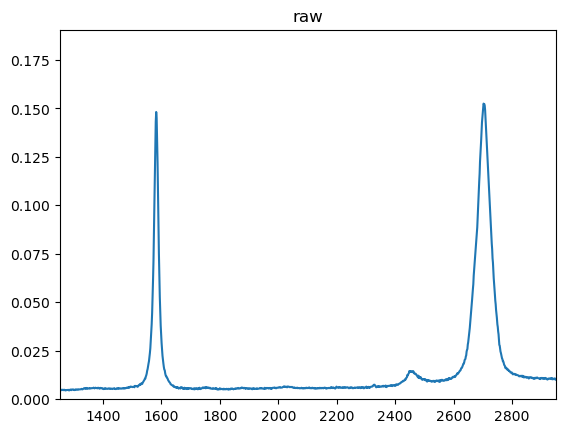

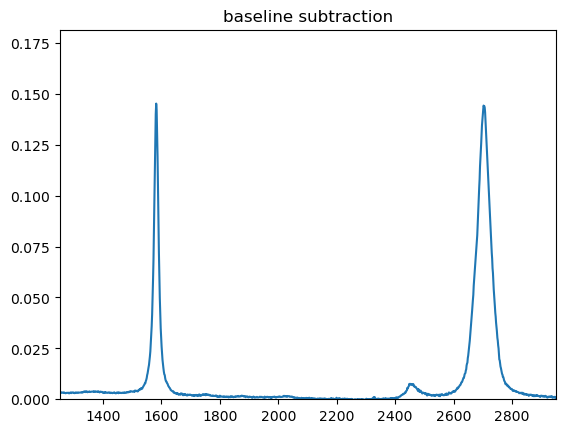

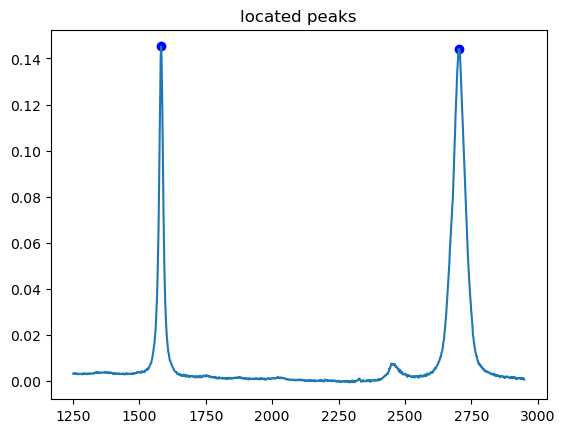

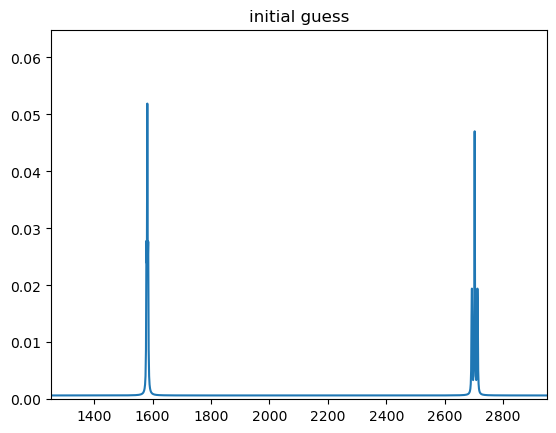

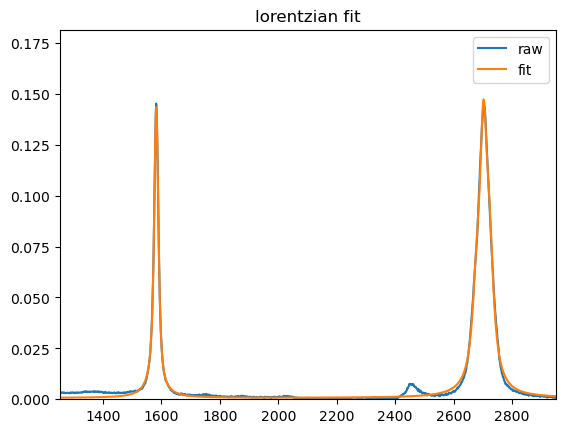

R^2 score: 0.995919352367642


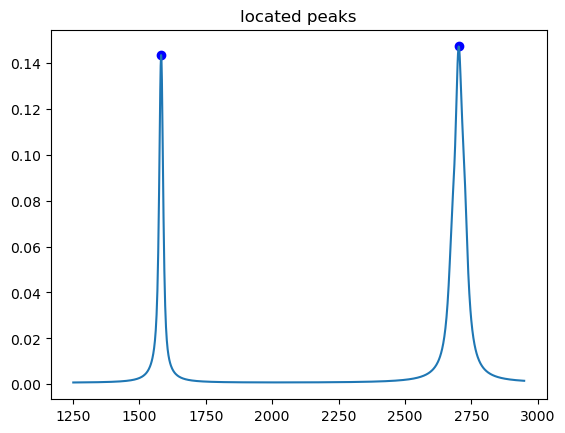

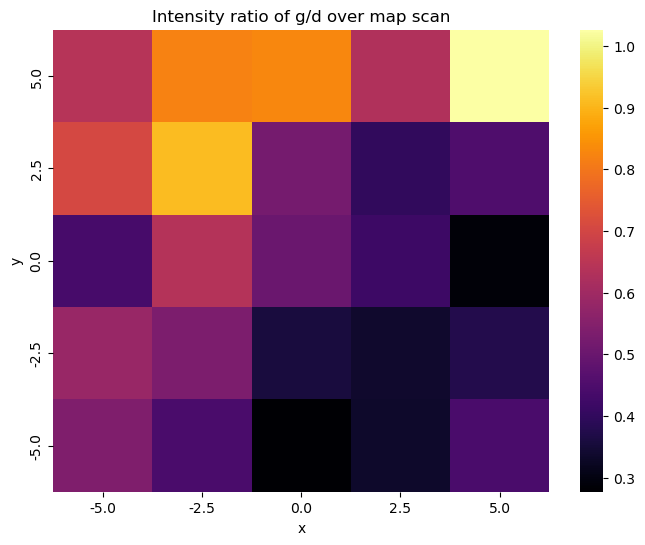

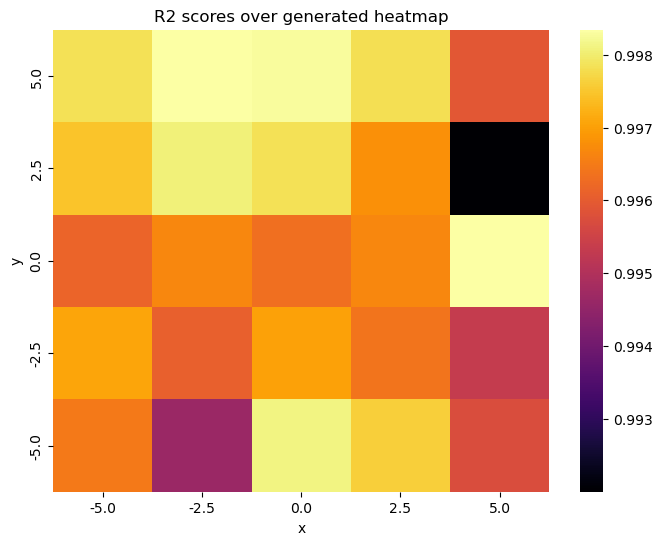

In [22]:
avg_ratio, heatmap, r2map, spectra = vis.heat_map(df, yx, raman_shift, height, spacing, deg, desired_ratio, 
                                                  ratio_label, voigt = False, lorentzian = True, gaussian = False)

# **Visualizing the heatmaps**

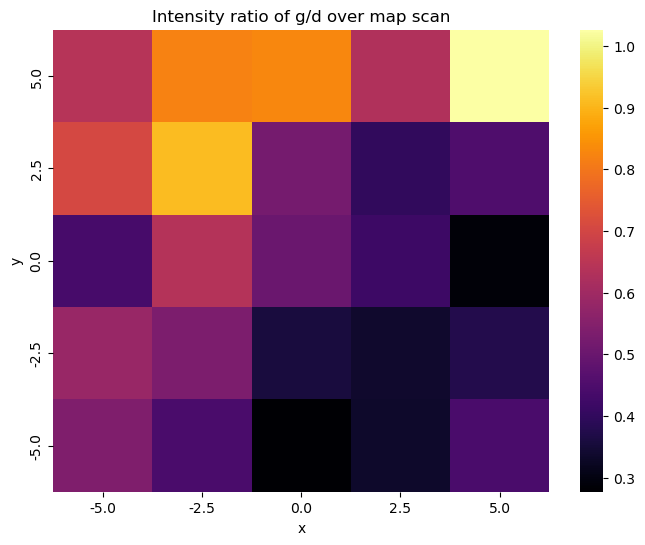

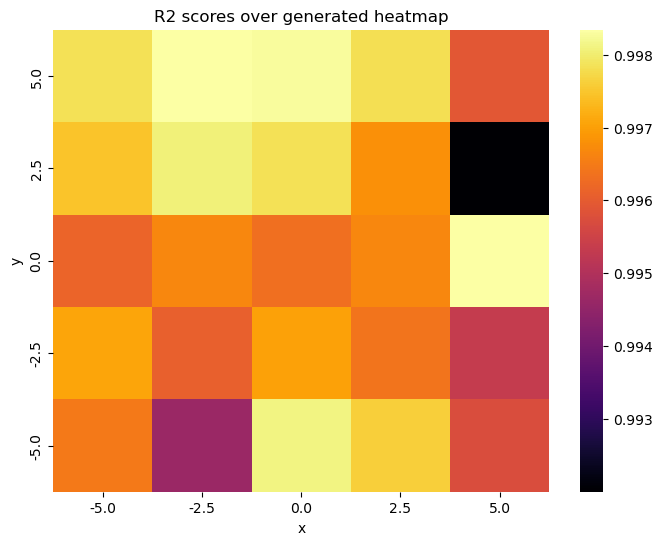

In [23]:
display(heatmap)
display(r2map)

# **If you're curious about any point on the heatmap, type in your desired x and y coordinates in the last two arguments of this cell**

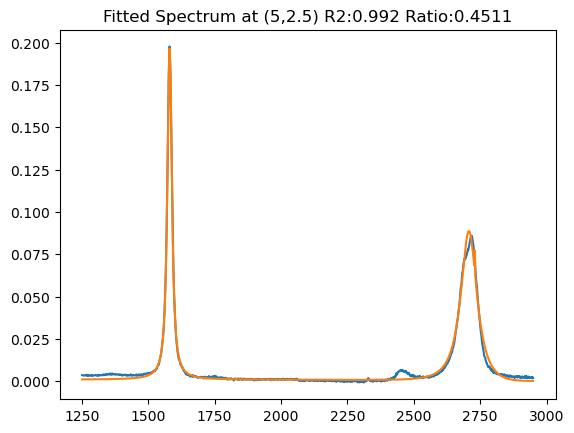

In [24]:
vis.lookup_spectrum(raman_shift, spectra, 5, 2.5)

# **Need information regarding any module or function? You can simply type "help(module_name)" for modules and "help(function_name)" for functions.**

In [25]:
help(fit)

Help on module fitting:

NAME
    fitting - # coding: utf-8

FUNCTIONS
    raman_gfitter(x, y, peaks)
        Fits input raman spectra data via gaussian method.

        Inputs:
        - x: Array containing Raman shift values.
        - y: Array containing respective intensity values.
        - peaks: Dictionary containing peak indices, values, peak ratio, raman shift peak locations, width values per peak, width heights,
                 and raman shift locations for widths

        Returns:
        - fit_intensity: Array containing newly fitted intensity values.
        - r2: Float number that is the R^2 score of the fit.

    raman_lfitter(x, y, peaks)
        Fits input raman spectra data via lorentzian method.

        Inputs:
        - x: Array containing Raman shift values.
        - y: Array containing respective intensity values.
        - peaks: Dictionary containing peak indices, values, peak ratio, raman shift peak locations, width values per peak, width heights,
          